# AI-based Surveying the Impact of Environmental, Climatic, Economic and Demographic Conditions on the Epidemic Outbreak Rate of COVID-19

$Mehryar{\,}Majd$, $Ramin{\,}Mousa$ \& $Arsalan{\,}Mousazadeh$

__Abstract:__ This study aims to have an analytical and predictive approach to the growth rate and spread of the first wave of COVID-19 infection and mainly focuses on its dependency on other global factors in affected countries via Artificial Intelligence-based processing of fatality data/statistics. Fatality, infected, and recovered cases in the form of the time-series data was acquired through the World Health Organization (WHO) & the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Recorded health data subsequently was analyzed by several Deep Neural Network (DNN) models to create a better intuition of epidemic outbreak rate of COVID-19. Monitoring spreading trend changes becomes more feasible via continuous observation of statistical pattern and integrating the other datasets with more global features count as factors influencing the local conditions on historical data conveys pivotal information concerning learning the pattern of epidemic progression. In this study, attention-based Sequence-to-Sequence (Seq2Seq) models empowered by Long-Short Term Memory (LSTM) and Gated Recurrent Unit (GRU) units, were deployed to predict mortality rate. Ultimately these analyses are utilized to monitor infection behaviour on time-series data and were subsequently assessed for their performance to predict the behaviour of the first wave of COVID-19 outbreak rate intensely. Demographic & environmental conditions have likely been influenced significantly to shape the reliable predictive learning algorithms for long-duration risk of COVID-19 pandemic.

### Prediction along with other data __weather data__, __economic data__
__Data Cleaning & Preprocessing__

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from matplotlib import pyplot as plt
import os
df_covid_19 = pd.read_csv("novel-corona-virus/covid_19_data.csv")
df_covid_19['Date'] = pd.to_datetime(df_covid_19['ObservationDate'])
df_covid_19['Outbreak'] = 'COVID_2019'
df_sars_03 = pd.read_csv("novel-corona-virus/sars_2003_complete_dataset_clean.csv")
df_sars_03['Date'] = pd.to_datetime(df_sars_03['Date'])
df_sars_03['Province/State'] = None
df_sars_03['Outbreak'] = 'SARS_2003'
df_sars_03.rename({'Cumulative number of case(s)':'Confirmed', 'Number of deaths':'Deaths', 'Number recovered':'Recovered', 'Country':'Country/Region'},axis=1,inplace=True)
templ_cols = ['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed', 'Deaths', 'Recovered']
df = pd.concat([df_covid_19[templ_cols], df_sars_03[templ_cols]])
#df=df_covid_19
df = df.reset_index(drop=True)
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Province/State'] = df['Province/State'].fillna('Others')
df = df.sort_values(['Country/Region','Province/State','Date'])
t = df.groupby(['Outbreak','Country/Region','Province/State']).agg({'Confirmed':'max'})
t = t.loc[t['Confirmed'] >=0]
df = pd.merge(df,t,left_on=['Outbreak','Country/Region','Province/State'], right_index=True)

country_data = pd.read_csv("novel-corona-virus/countries of the world.csv")
country_data['Country'] = country_data['Country'].str.strip()
df.loc[df['Country/Region']=='US','Country/Region'] = 'United States'
df.loc[df['Country/Region']=='Mainland China','Country/Region'] = 'China'
df.loc[df['Country/Region']=='Viet Nam','Country/Region'] = 'Vietnam'
df.loc[df['Country/Region']=='UK','Country/Region'] = 'United Kingdom'
df.loc[df['Country/Region']=='South Korea','Country/Region'] = 'Korea, South'
df.loc[df['Country/Region']=='Taiwan, China','Country/Region'] = 'Taiwan'
df.loc[df['Country/Region']=='Hong Kong SAR, China','Country/Region'] = 'Hong Kong'
df = pd.merge(df, country_data, how='left', left_on=['Country/Region'], right_on=['Country'])
df['Date'] = pd.to_datetime(df['Date'])

In [2]:

df.loc[df['Region'].isnull(), 'Region'] = 'Others'
df.loc[df['Country'].isnull(), 'Country'] = 'Undefined'
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.week
df = df.fillna(0)
df=df.drop('Other (%)',axis=1)

In [3]:
import locale
from fastnumbers import fast_real
Literacy=[]
Pop,Pho,Agric=[],[],[]
Coa,Clim,Bir,Dea=[],[],[],[]
Net,Inf,Arab,Crop,Ind,Serv=[],[],[],[],[],[]
for index ,row in df.iterrows():
    a=str(row['Literacy (%)']).replace(',','.')
    Literacy.append(fast_real(a))
    #----------
    a=str(row['Pop. Density (per sq. mi.)']).replace(',','.')
    Pop.append(fast_real(a))
    #----------
    a=str(row['Coastline (coast/area ratio)']).replace(',','.')
    Coa.append(fast_real(a))
    #-----------
    a=str(row['Net migration']).replace(',','.')
    Net.append(fast_real(a))
    #-----------
    a=str(row['Infant mortality (per 1000 births)']).replace(',','.')
    Inf.append(fast_real(a))
    #
    #
    a=str(row['Phones (per 1000)']).replace(',','.')
    Pho.append(fast_real(a))
    #
    a=str(row['Arable (%)']).replace(',','.')
    Arab.append(fast_real(a))
    #
    a=str(row['Crops (%)']).replace(',','.')
    Crop.append(fast_real(a))
    #
    a=str(row['Climate']).replace(',','.')
    Clim.append(fast_real(a))
    #
    a=str(row['Birthrate']).replace(',','.')
    Bir.append(fast_real(a))
    #
    a=str(row['Deathrate']).replace(',','.')
    Dea.append(fast_real(a))
    #
    a=str(row['Agriculture']).replace(',','.')
    Agric.append(fast_real(a))
    #
    a=str(row['Industry']).replace(',','.')
    Ind.append(fast_real(a))
    #
    a=str(row['Service']).replace(',','.')
    Serv.append(fast_real(a))
df['Literacy (%)']=Literacy
df['Pop. Density (per sq. mi.)']=Pop
df['Coastline (coast/area ratio)']=Coa
df['Net migration']=Net
df['Infant mortality (per 1000 births)']=Inf
df['Phones (per 1000)']=Pho
df['Arable (%)']=Arab
df['Crops (%)']=Crop
df['Climate']=Clim
df['Birthrate']=Bir
df['Deathrate']=Dea
df['Agriculture']=Agric
df['Industry']=Ind
df['Service']=Serv


In [4]:
df['Country/Region'] = df['Country/Region'].astype('category')
df['Outbreak'] = df['Outbreak'].astype('category')
df['Country/Region'] = df['Country/Region'].cat.codes
df['Outbreak'] = df['Outbreak'].cat.codes
df.head()

,Outbreak,Province/State,Country/Region,Date,Confirmed_x,Deaths,Recovered,Confirmed_y,Country,Region,...,Arable (%),Crops (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Month,Week
0,0,Others,0,2020-02-28,1.0,0.0,0.0,1.0,Undefined,Others,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,2,9
1,0,Others,1,2020-03-10,2.0,0.0,0.0,2.0,Undefined,Others,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,3,11
2,0,Others,2,2020-02-24,1.0,0.0,0.0,21.0,Afghanistan,ASIA (EX. NEAR EAST),...,12.13,0.22,1.0,46.6,20.34,0.38,0.24,0.38,2,9
3,0,Others,2,2020-02-25,1.0,0.0,0.0,21.0,Afghanistan,ASIA (EX. NEAR EAST),...,12.13,0.22,1.0,46.6,20.34,0.38,0.24,0.38,2,9
4,0,Others,2,2020-02-26,1.0,0.0,0.0,21.0,Afghanistan,ASIA (EX. NEAR EAST),...,12.13,0.22,1.0,46.6,20.34,0.38,0.24,0.38,2,9


In [5]:
df.keys()
new_df=df.copy()


# Industry

In [6]:
col=['Outbreak','Country/Region', 'Industry','Confirmed_x','Deaths','Recovered']
df=df[col]

In [7]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import LSTM,GRU
from keras.layers import Dense
def load_data(data, time_step=2, after_day=1, validate_percent=0.67):
    seq_length = time_step + after_day
    result = []
    for index in range(len(data) - seq_length + 1):
        result.append(data[index: index + seq_length])
    result = np.array(result)
    print('total data: ', result.shape)

    train_size = int(len(result) * validate_percent)
    train = result[:train_size, :]
    validate = result[train_size:, :]

    x_train = train[:, :time_step]
    y_train = train[:, time_step:]
    x_validate = validate[:, :time_step]
    y_validate = validate[:, time_step:]
    
     

    return [x_train, y_train, x_validate, y_validate]
def base_model(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(LSTM(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model

def seq2seq(feature_len=1, after_day=1, input_shape=(8, 1)):
    '''
    Encoder:
    X = Input sequence
    C = LSTM(X); The context vector

    Decoder:
    y(t) = LSTM(s(t-1), y(t-1)); where s is the hidden state of the LSTM(h and c)
    y(0) = LSTM(s0, C); C is the context vector from the encoder.
    '''

    # Encoder
    encoder_inputs = Input(shape=input_shape) # (timesteps, feature)
    encoder = LSTM(units=100, return_state=True,  name='encoder')
    encoder_outputs, state_h, state_c = encoder(encoder_inputs)
    states = [state_h, state_c]

    # Decoder
    reshapor = Reshape((1, 100), name='reshapor')
    decoder = LSTM(units=100, return_sequences=True, return_state=True, name='decoder')

    # Densor
    #tdensor = TimeDistributed(Dense(units=200, activation='linear', name='time_densor'))
    densor_output = Dense(units=feature_len, activation='linear', name='output')

    inputs = reshapor(encoder_outputs)
    #inputs = tdensor(inputs)
    all_outputs = []



    for _ in range(after_day):
        outputs, h, c = decoder(inputs, initial_state=states)

        #inputs = tdensor(outputs)
        inputs = outputs
        states = [state_h, state_c]

        outputs = densor_output(outputs)
        all_outputs.append(outputs)

    decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)
    model = Model(inputs=encoder_inputs, outputs=decoder_outputs)

    return model
def normalize_data(data, scaler, feature_len):
    minmaxscaler = scaler.fit(data)
    normalize_data = minmaxscaler.transform(data)
    return normalize_data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

Using TensorFlow backend.


total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


In [8]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD,Adam
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 6s 834us/step - loss: 0.0479 - acc: 0.6699 - rmse: 0.1935 - mse: 0.0479 - r_square: 0.3655 - val_loss: 0.0435 - val_acc: 0.9823 - val_rmse: 0.1958 - val_mse: 0.0435 - val_r_square: 0.6792
Epoch 2/100
6946/6946 [==============================] - 2s 293us/step - loss: 0.0298 - acc: 0.7813 - rmse: 0.1481 - mse: 0.0298 - r_square: 0.6068 - val_loss: 0.0310 - val_acc: 0.8365 - val_rmse: 0.1704 - val_mse: 0.0310 - val_r_square: 0.7718
Epoch 3/100
6946/6946 [==============================] - 2s 317us/step - loss: 0.0201 - acc: 0.8515 - rmse: 0.1151 - mse: 0.0201 - r_square: 0.7260 - val_loss: 0.0173 - val_acc: 0.8365 - val_rmse: 0.1249 - val_mse: 0.0173 - val_r_square: 0.8747
Epoch 4/100
6946/6946 [==============================] - 3s 368us/step - loss: 0.0142 - acc: 0.92

Epoch 32/100
6946/6946 [==============================] - 2s 277us/step - loss: 0.0052 - acc: 0.9544 - rmse: 0.0342 - mse: 0.0052 - r_square: 0.9312 - val_loss: 0.0017 - val_acc: 0.9414 - val_rmse: 0.0264 - val_mse: 0.0017 - val_r_square: 0.9897
Epoch 33/100
6946/6946 [==============================] - 2s 271us/step - loss: 0.0052 - acc: 0.9561 - rmse: 0.0347 - mse: 0.0052 - r_square: 0.9308 - val_loss: 0.0017 - val_acc: 0.9414 - val_rmse: 0.0269 - val_mse: 0.0017 - val_r_square: 0.9895
Epoch 34/100
6946/6946 [==============================] - 2s 275us/step - loss: 0.0052 - acc: 0.9547 - rmse: 0.0340 - mse: 0.0052 - r_square: 0.9308 - val_loss: 0.0017 - val_acc: 0.9423 - val_rmse: 0.0271 - val_mse: 0.0017 - val_r_square: 0.9893
Epoch 35/100
6946/6946 [==============================] - 2s 261us/step - loss: 0.0051 - acc: 0.9560 - rmse: 0.0339 - mse: 0.0051 - r_square: 0.9331 - val_loss: 0.0017 - val_acc: 0.9419 - val_rmse: 0.0265 - val_mse: 0.0017 - val_r_square: 0.9895
Epoch 36/100
694

6946/6946 [==============================] - 2s 263us/step - loss: 0.0052 - acc: 0.9461 - rmse: 0.0409 - mse: 0.0052 - r_square: 0.9280 - val_loss: 0.0014 - val_acc: 0.8377 - val_rmse: 0.0202 - val_mse: 0.0014 - val_r_square: 0.9918
Epoch 99/100
6946/6946 [==============================] - 2s 253us/step - loss: 0.0061 - acc: 0.9436 - rmse: 0.0487 - mse: 0.0061 - r_square: 0.9203 - val_loss: 0.0030 - val_acc: 0.8377 - val_rmse: 0.0455 - val_mse: 0.0030 - val_r_square: 0.9804
Epoch 100/100
6946/6946 [==============================] - 2s 255us/step - loss: 0.0056 - acc: 0.9497 - rmse: 0.0444 - mse: 0.0056 - r_square: 0.9251 - val_loss: 0.0017 - val_acc: 0.8377 - val_rmse: 0.0267 - val_mse: 0.0017 - val_r_square: 0.9899


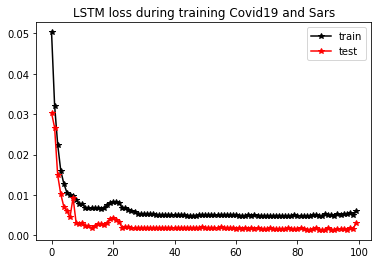

In [32]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("LSTM loss during training Covid19 and Sars")
plt.show()

In [33]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 5s 691us/step - loss: 0.0146 - acc: 0.8163 - mse: 0.0146 - rmse: 0.0971 - r_square: 0.7896 - val_loss: 0.0091 - val_acc: 0.9931 - val_mse: 0.0091 - val_rmse: 0.0915 

Epoch 31/100
6946/6946 [==============================] - 1s 205us/step - loss: 0.0067 - acc: 0.9408 - mse: 0.0067 - rmse: 0.0553 - r_square: 0.8994 - val_loss: 0.0018 - val_acc: 0.9942 - val_mse: 0.0018 - val_rmse: 0.0281 - val_r_square: 0.9890
Epoch 32/100
6946/6946 [==============================] - 1s 201us/step - loss: 0.0060 - acc: 0.9611 - mse: 0.0060 - rmse: 0.0499 - r_square: 0.9178 - val_loss: 0.0023 - val_acc: 0.9020 - val_mse: 0.0023 - val_rmse: 0.0359 - val_r_square: 0.9857
Epoch 33/100
6946/6946 [==============================] - 1s 205us/step - loss: 0.0062 - acc: 0.9541 - mse: 0.0062 - rmse: 0.0514 - r_square: 0.9067 - val_loss: 0.0026 - val_acc: 0.9941 - val_mse: 0.0026 - val_rmse: 0.0415 - val_r_square: 0.9823
Epoch 34/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0070 - acc: 0.9392 - mse: 0.0070 - rmse: 0.0579 - r_square: 0.9000 - val_loss: 0.0018 - val_acc: 0.9918 - val_mse: 0.0018 - val_rmse: 0.0284 - val_r_square: 0.9890
Epoch 35/100
694

6946/6946 [==============================] - 1s 204us/step - loss: 0.0059 - acc: 0.9471 - mse: 0.0059 - rmse: 0.0479 - r_square: 0.9164 - val_loss: 0.0017 - val_acc: 0.9436 - val_mse: 0.0017 - val_rmse: 0.0272 - val_r_square: 0.9898
Epoch 98/100
6946/6946 [==============================] - 1s 208us/step - loss: 0.0063 - acc: 0.9425 - mse: 0.0063 - rmse: 0.0494 - r_square: 0.9133 - val_loss: 0.0022 - val_acc: 0.8935 - val_mse: 0.0022 - val_rmse: 0.0365 - val_r_square: 0.9856
Epoch 99/100
6946/6946 [==============================] - 2s 230us/step - loss: 0.0059 - acc: 0.9303 - mse: 0.0059 - rmse: 0.0473 - r_square: 0.9167 - val_loss: 0.0016 - val_acc: 0.9185 - val_mse: 0.0016 - val_rmse: 0.0253 - val_r_square: 0.9905
Epoch 100/100
6946/6946 [==============================] - 2s 242us/step - loss: 0.0055 - acc: 0.9533 - mse: 0.0055 - rmse: 0.0442 - r_square: 0.9222 - val_loss: 0.0021 - val_acc: 0.9442 - val_mse: 0.0021 - val_rmse: 0.0342 - val_r_square: 0.9866


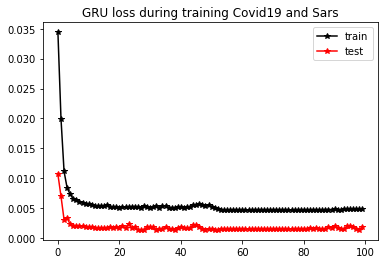

In [37]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("GRU loss during training Covid19 and Sars")
#plt.savefig("LSTMLOSS_Covid19_Sars.pdf", bbox_inches='tight')
plt.show()

# Seq2Seq

In [38]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 10s 1ms/step - loss: 0.0357 - acc: 0.6459 - rmse: 0.1640 - mse: 0.0357 - r_square: 0.4811 - val_loss: 0.0167 - val_acc: 0.9357 - val_rmse: 0.1245 - val_mse: 0.0167 - val_r_square: 0.8782
Epoch 2/100
6946/6946 [==============================] - 2s 304us/step - loss: 0.0179 - acc: 0.8035 - rmse: 0.1038 - mse: 0.0179 - r_square: 0.7637 - val_loss: 0.0088 - val_acc: 0.8365 - val_rmse: 0.0888 - val_mse: 0.0088 - val_r_square: 0.9395
Epoch 3/100
6946/6946 [==============================] - 2s 349us/step - loss: 0.0135 - acc: 0.8675 - rmse: 0.0857 - mse: 0.0135 - r_square: 0.8217 - val_loss: 0.0037 - val_acc: 0.8365 - val_rmse: 0.0494 - val_mse: 0.0037 - val_r_square: 0.9766
Epoch 4/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0089 - acc: 0.9097 - rmse: 0.0618 - mse: 0.0089 - r_square: 0.8798 - val_loss: 0.0029 - val_acc: 0.8365 - val_rmse: 0.0409 - val_mse: 0.0

6946/6946 [==============================] - 2s 295us/step - loss: 0.0046 - acc: 0.9556 - rmse: 0.0286 - mse: 0.0046 - r_square: 0.9396 - val_loss: 0.0015 - val_acc: 0.9414 - val_rmse: 0.0217 - val_mse: 0.0015 - val_r_square: 0.9912
Epoch 68/100
6946/6946 [==============================] - 2s 300us/step - loss: 0.0047 - acc: 0.9545 - rmse: 0.0289 - mse: 0.0047 - r_square: 0.9394 - val_loss: 0.0014 - val_acc: 0.9518 - val_rmse: 0.0216 - val_mse: 0.0014 - val_r_square: 0.9913
Epoch 69/100
6946/6946 [==============================] - 2s 298us/step - loss: 0.0046 - acc: 0.9557 - rmse: 0.0287 - mse: 0.0046 - r_square: 0.9394 - val_loss: 0.0015 - val_acc: 0.9416 - val_rmse: 0.0234 - val_mse: 0.0015 - val_r_square: 0.9906
Epoch 70/100
6946/6946 [==============================] - 2s 327us/step - loss: 0.0047 - acc: 0.9545 - rmse: 0.0294 - mse: 0.0047 - r_square: 0.9390 - val_loss: 0.0015 - val_acc: 0.9548 - val_rmse: 0.0226 - val_mse: 0.0015 - val_r_square: 0.9908
Epoch 71/100
6946/6946 [=====

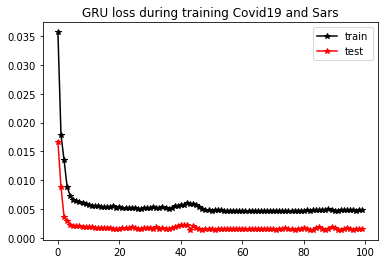

In [39]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("GRU loss during training Covid19 and Sars")
#plt.savefig("LSTMLOSS_Covid19_Sars.pdf", bbox_inches='tight')
plt.show()

# Deathrate

In [40]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [41]:
col=['Outbreak','Country/Region', 'Deathrate','Confirmed_x','Deaths','Recovered']
df=new_df[col]

In [42]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [43]:
from keras import backend as K
from keras.models import Sequential, load_model, Model
from keras.layers import LSTM, Dense, Activation, TimeDistributed, Dropout, Lambda, RepeatVector, Input, Reshape
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD,Adam
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))
def mse(y_true, y_pred):
    from keras import backend
    return backend.mean(backend.square(y_pred - y_true), axis=-1)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 8s 1ms/step - loss: 0.0465 - acc: 0.7278 - rmse: 0.1816 - mse: 0.0465 - r_square: 0.3195 - val_loss: 0.0233 - val_acc: 0.8365 - val_rmse: 0.1342 - val_mse: 0.0233 - val_r_square: 0.8382
Epoch 2/100
6946/6946 [==============================] - 2s 326us/step - loss: 0.0309 - acc: 0.7264 - rmse: 0.1436 - mse: 0.0309 - r_square: 0.5718 - val_loss: 0.0205 - val_acc: 0.8365 - val_rmse: 0.1353 - val_mse: 0.0205 - val_r_square: 0.8567
Epoch 3/100
6946/6946 [==============================] - 2s 321us/step - loss: 0.0242 - acc: 0.7404 - rmse: 0.1257 - mse: 0.0242 - r_square: 0.6706 - val_loss: 0.0167 - val_acc: 0.8365 - val_rmse: 0.1222 - val_mse: 0.0167 - val_r_square: 0.8835
Epoch 4/100
6946/6946 [==============================] - 2s 291us/step - loss: 0.0178 - acc: 0.8760 - rmse: 0.1040 - mse: 0.0178 - r_square: 0.7562 - val_loss: 0.0109 - val_acc: 0.8365 - val_rmse: 0.0974 - val_mse: 0.01

6946/6946 [==============================] - 2s 314us/step - loss: 0.0048 - acc: 0.9529 - rmse: 0.0326 - mse: 0.0048 - r_square: 0.9380 - val_loss: 0.0015 - val_acc: 0.9666 - val_rmse: 0.0237 - val_mse: 0.0015 - val_r_square: 0.9906
Epoch 68/100
6946/6946 [==============================] - 2s 316us/step - loss: 0.0048 - acc: 0.9534 - rmse: 0.0327 - mse: 0.0048 - r_square: 0.9379 - val_loss: 0.0015 - val_acc: 0.9647 - val_rmse: 0.0239 - val_mse: 0.0015 - val_r_square: 0.9905
Epoch 69/100
6946/6946 [==============================] - 2s 302us/step - loss: 0.0049 - acc: 0.9506 - rmse: 0.0331 - mse: 0.0049 - r_square: 0.9370 - val_loss: 0.0015 - val_acc: 0.9665 - val_rmse: 0.0237 - val_mse: 0.0015 - val_r_square: 0.9906
Epoch 70/100
6946/6946 [==============================] - 3s 388us/step - loss: 0.0049 - acc: 0.9538 - rmse: 0.0330 - mse: 0.0049 - r_square: 0.9364 - val_loss: 0.0015 - val_acc: 0.9551 - val_rmse: 0.0239 - val_mse: 0.0015 - val_r_square: 0.9906
Epoch 71/100
6946/6946 [=====

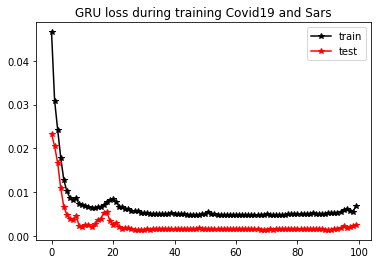

In [44]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("GRU loss during training Covid19 and Sars")
#plt.savefig("LSTMLOSS_Covid19_Sars.pdf", bbox_inches='tight')
plt.show()

# Seq2Seq

In [45]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 9s 1ms/step - loss: 0.0269 - acc: 0.7440 - rmse: 0.1394 - mse: 0.0269 - r_square: 0.5291 - val_loss: 0.0058 - val_acc: 0.8365 - val_rmse: 0.0666 - val_mse: 0.0058 - val_r_square: 0.9621
Epoch 2/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0159 - acc: 0.7590 - rmse: 0.0979 - mse: 0.0159 - r_square: 0.7610 - val_loss: 0.0065 - val_acc: 0.8365 - val_rmse: 0.0746 - val_mse: 0.0065 - val_r_square: 0.9556
Epoch 3/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0102 - acc: 0.8666 - rmse: 0.0667 - mse: 0.0102 - r_square: 0.8621 - val_loss: 0.0031 - val_acc: 0.8365 - val_rmse: 0.0441 - val_mse: 0.0031 - val_r_square: 0.9804
Epoch 4/100
6946/6946 [==============================] - 2s 311us/step - loss: 0.0077 - acc: 0.9139 - rmse: 0.0553 - mse: 0.0077 - r_square: 0.8963 - val_loss: 0.0024 - val_acc: 0.8365 - val_rmse: 0.0353 - val_mse: 0.00

6946/6946 [==============================] - 2s 304us/step - loss: 0.0048 - acc: 0.9608 - rmse: 0.0309 - mse: 0.0048 - r_square: 0.9391 - val_loss: 0.0014 - val_acc: 0.8513 - val_rmse: 0.0214 - val_mse: 0.0014 - val_r_square: 0.9918
Epoch 68/100
6946/6946 [==============================] - 2s 301us/step - loss: 0.0048 - acc: 0.9607 - rmse: 0.0299 - mse: 0.0048 - r_square: 0.9398 - val_loss: 0.0013 - val_acc: 0.8650 - val_rmse: 0.0204 - val_mse: 0.0013 - val_r_square: 0.9920
Epoch 69/100
6946/6946 [==============================] - 2s 301us/step - loss: 0.0047 - acc: 0.9598 - rmse: 0.0291 - mse: 0.0047 - r_square: 0.9403 - val_loss: 0.0013 - val_acc: 0.8659 - val_rmse: 0.0196 - val_mse: 0.0013 - val_r_square: 0.9922
Epoch 70/100
6946/6946 [==============================] - 2s 301us/step - loss: 0.0047 - acc: 0.9600 - rmse: 0.0286 - mse: 0.0047 - r_square: 0.9402 - val_loss: 0.0013 - val_acc: 0.8784 - val_rmse: 0.0192 - val_mse: 0.0013 - val_r_square: 0.9923
Epoch 71/100
6946/6946 [=====

# GRU

In [46]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    model.add(RepeatVector(after_day))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_8 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_8 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 7s 1ms/step - loss: 0.0169 - acc: 0.7232 - mse: 0.0169 - rmse: 0.1061 - r_square: 0.7136 - val_loss: 0.0055 - val_acc: 0.8368 - val_mse: 0.0055 - val_rmse: 0.0680 - 

Epoch 31/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0063 - acc: 0.9455 - mse: 0.0063 - rmse: 0.0495 - r_square: 0.9098 - val_loss: 0.0018 - val_acc: 0.9925 - val_mse: 0.0018 - val_rmse: 0.0300 - val_r_square: 0.9889
Epoch 32/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0062 - acc: 0.9529 - mse: 0.0062 - rmse: 0.0494 - r_square: 0.9154 - val_loss: 0.0030 - val_acc: 0.8365 - val_mse: 0.0030 - val_rmse: 0.0459 - val_r_square: 0.9804
Epoch 33/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0065 - acc: 0.9386 - mse: 0.0065 - rmse: 0.0535 - r_square: 0.9008 - val_loss: 0.0014 - val_acc: 0.8366 - val_mse: 0.0014 - val_rmse: 0.0192 - val_r_square: 0.9920
Epoch 34/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0065 - acc: 0.9502 - mse: 0.0065 - rmse: 0.0482 - r_square: 0.9134 - val_loss: 0.0035 - val_acc: 0.9937 - val_mse: 0.0035 - val_rmse: 0.0504 - val_r_square: 0.9760
Epoch 35/100
694

6946/6946 [==============================] - 1s 211us/step - loss: 0.0053 - acc: 0.9440 - mse: 0.0053 - rmse: 0.0420 - r_square: 0.9289 - val_loss: 0.0018 - val_acc: 0.9942 - val_mse: 0.0018 - val_rmse: 0.0292 - val_r_square: 0.9890
Epoch 98/100
6946/6946 [==============================] - 1s 211us/step - loss: 0.0054 - acc: 0.9536 - mse: 0.0054 - rmse: 0.0433 - r_square: 0.9271 - val_loss: 0.0022 - val_acc: 0.8641 - val_mse: 0.0022 - val_rmse: 0.0358 - val_r_square: 0.9861
Epoch 99/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0053 - acc: 0.9216 - mse: 0.0053 - rmse: 0.0413 - r_square: 0.9268 - val_loss: 0.0012 - val_acc: 0.8502 - val_mse: 0.0012 - val_rmse: 0.0131 - val_r_square: 0.9931
Epoch 100/100
6946/6946 [==============================] - 1s 206us/step - loss: 0.0052 - acc: 0.9511 - mse: 0.0052 - rmse: 0.0413 - r_square: 0.9290 - val_loss: 0.0021 - val_acc: 0.9942 - val_mse: 0.0021 - val_rmse: 0.0337 - val_r_square: 0.9867


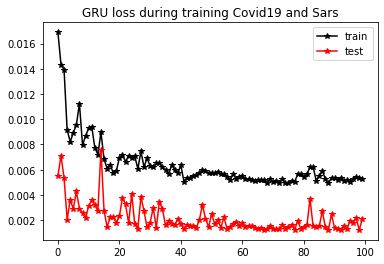

In [47]:
plt.plot(history.history['loss'],'k-*',label='train')
plt.plot(history.history['val_loss'],'r-*', label='test')
plt.legend()
plt.title("GRU loss during training Covid19 and Sars")
plt.show()

# Agriculture

In [62]:
col=['Outbreak','Country/Region','Agriculture','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [63]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 11s 2ms/step - loss: 0.0348 - acc: 0.7535 - rmse: 0.1535 - mse: 0.0348 - r_square: 0.3632 - val_loss: 0.0266 - val_acc: 0.8994 - val_rmse: 0.1475 - val_mse: 0.0266 - val_r_square: 0.8151
Epoch 2/100
6946/6946 [==============================] - 2s 285us/step - loss: 0.0240 - acc: 0.8875 - rmse: 0.1242 - mse: 0.0240 - r_square: 0.5582 - val_loss: 0.0199 - val_acc: 0.8365 - val_rmse: 0.1338 - val_mse: 0.0199 - val_r_square: 0.8615
Epoch 3/100
6946/6946 [==============================] - 2s 287us/step - loss: 0.0188 - acc: 0.8950 - rmse: 0.1051 - mse: 0.0188 - r_square: 0.6655 - val_loss: 0.0165 - val_acc: 0.8365 - val_rmse: 0.1232 - val_mse: 0.0165 - val_r_square: 0.8851
Epoch 4/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0153 - acc: 0.8007 - rmse: 0.0932 - mse: 0.0153 - r_square: 0.7346 - val_loss: 0.0142 - val_acc: 0.8365 - val_rmse: 0.1151 - val_mse: 0.0

6946/6946 [==============================] - 2s 264us/step - loss: 0.0044 - acc: 0.9666 - rmse: 0.0269 - mse: 0.0044 - r_square: 0.9126 - val_loss: 0.0014 - val_acc: 0.9442 - val_rmse: 0.0234 - val_mse: 0.0014 - val_r_square: 0.9913
Epoch 68/100
6946/6946 [==============================] - 2s 266us/step - loss: 0.0044 - acc: 0.9641 - rmse: 0.0265 - mse: 0.0044 - r_square: 0.9126 - val_loss: 0.0015 - val_acc: 0.9442 - val_rmse: 0.0241 - val_mse: 0.0015 - val_r_square: 0.9910
Epoch 69/100
6946/6946 [==============================] - 2s 267us/step - loss: 0.0045 - acc: 0.9657 - rmse: 0.0271 - mse: 0.0045 - r_square: 0.9109 - val_loss: 0.0015 - val_acc: 0.9444 - val_rmse: 0.0235 - val_mse: 0.0015 - val_r_square: 0.9912
Epoch 70/100
6946/6946 [==============================] - 2s 267us/step - loss: 0.0045 - acc: 0.9655 - rmse: 0.0268 - mse: 0.0045 - r_square: 0.9097 - val_loss: 0.0015 - val_acc: 0.9446 - val_rmse: 0.0243 - val_mse: 0.0015 - val_r_square: 0.9909
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [64]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0282 - acc: 0.7359 - rmse: 0.1338 - mse: 0.0282 - r_square: 0.4631 - val_loss: 0.0070 - val_acc: 0.9368 - val_rmse: 0.0764 - val_mse: 0.0070 - val_r_square: 0.9530
Epoch 2/100
6946/6946 [==============================] - 2s 311us/step - loss: 0.0141 - acc: 0.8742 - rmse: 0.0964 - mse: 0.0141 - r_square: 0.6487 - val_loss: 0.0067 - val_acc: 0.8365 - val_rmse: 0.0755 - val_mse: 0.0067 - val_r_square: 0.9554
Epoch 3/100
6946/6946 [==============================] - 2s 316us/step - loss: 0.0102 - acc: 0.8811 - rmse: 0.0669 - mse: 0.0102 - r_square: 0.8043 - val_loss: 0.0034 - val_acc: 0.8365 - val_rmse: 0.0481 - val_mse: 0.0034 - val_r_square: 0.9785
Epoch 4/100
6946/6946 [==============================] - 2s 315us/step - loss: 0.0079 - acc: 0.8770 - rmse: 0.0564 - mse: 0.0079 - r_square: 0.8407 - val_loss: 0.0031 - val_acc: 0.8365 - val_rmse: 0.0456 - val_mse: 0.0

6946/6946 [==============================] - 2s 309us/step - loss: 0.0047 - acc: 0.9254 - rmse: 0.0307 - mse: 0.0047 - r_square: 0.9106 - val_loss: 0.0016 - val_acc: 0.8382 - val_rmse: 0.0265 - val_mse: 0.0016 - val_r_square: 0.9905
Epoch 68/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0046 - acc: 0.9264 - rmse: 0.0301 - mse: 0.0046 - r_square: 0.9119 - val_loss: 0.0015 - val_acc: 0.8502 - val_rmse: 0.0257 - val_mse: 0.0015 - val_r_square: 0.9908
Epoch 69/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0045 - acc: 0.9263 - rmse: 0.0295 - mse: 0.0045 - r_square: 0.9129 - val_loss: 0.0015 - val_acc: 0.8507 - val_rmse: 0.0257 - val_mse: 0.0015 - val_r_square: 0.9908
Epoch 70/100
6946/6946 [==============================] - 2s 312us/step - loss: 0.0045 - acc: 0.9268 - rmse: 0.0289 - mse: 0.0045 - r_square: 0.9131 - val_loss: 0.0015 - val_acc: 0.8649 - val_rmse: 0.0249 - val_mse: 0.0015 - val_r_square: 0.9911
Epoch 71/100
6946/6946 [=====

# GRU

In [65]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_14 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_14 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_14 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 11s 2ms/step - loss: 0.0147 - acc: 0.7676 - mse: 0.0147 - rmse: 0.0974 - r_square: 0.5798 - val_loss: 0.0094 - val_acc: 0.9934 - val_mse: 0.0094 - val_rmse: 0.0911 -

Epoch 31/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0049 - acc: 0.9261 - mse: 0.0049 - rmse: 0.0365 - r_square: 0.8918 - val_loss: 0.0014 - val_acc: 0.9915 - val_mse: 0.0014 - val_rmse: 0.0203 - val_r_square: 0.9920
Epoch 32/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0052 - acc: 0.9481 - mse: 0.0052 - rmse: 0.0391 - r_square: 0.8996 - val_loss: 0.0021 - val_acc: 0.9942 - val_mse: 0.0021 - val_rmse: 0.0342 - val_r_square: 0.9871
Epoch 33/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0051 - acc: 0.9479 - mse: 0.0051 - rmse: 0.0392 - r_square: 0.8941 - val_loss: 0.0023 - val_acc: 0.9927 - val_mse: 0.0023 - val_rmse: 0.0377 - val_r_square: 0.9848
Epoch 34/100
6946/6946 [==============================] - 2s 218us/step - loss: 0.0050 - acc: 0.9267 - mse: 0.0050 - rmse: 0.0389 - r_square: 0.8948 - val_loss: 0.0015 - val_acc: 0.9942 - val_mse: 0.0015 - val_rmse: 0.0237 - val_r_square: 0.9911
Epoch 35/100
694

6946/6946 [==============================] - 1s 213us/step - loss: 0.0048 - acc: 0.9247 - mse: 0.0048 - rmse: 0.0356 - r_square: 0.9054 - val_loss: 0.0018 - val_acc: 0.8371 - val_mse: 0.0018 - val_rmse: 0.0300 - val_r_square: 0.9893
Epoch 98/100
6946/6946 [==============================] - 2s 218us/step - loss: 0.0051 - acc: 0.8259 - mse: 0.0051 - rmse: 0.0399 - r_square: 0.8841 - val_loss: 0.0025 - val_acc: 0.8374 - val_mse: 0.0025 - val_rmse: 0.0404 - val_r_square: 0.9844
Epoch 99/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0049 - acc: 0.9333 - mse: 0.0049 - rmse: 0.0378 - r_square: 0.8967 - val_loss: 0.0016 - val_acc: 0.8392 - val_mse: 0.0016 - val_rmse: 0.0249 - val_r_square: 0.9908
Epoch 100/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0055 - acc: 0.9525 - mse: 0.0055 - rmse: 0.0451 - r_square: 0.8812 - val_loss: 0.0026 - val_acc: 0.9551 - val_mse: 0.0026 - val_rmse: 0.0411 - val_r_square: 0.9827


# Population

In [55]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [66]:
col=['Outbreak','Country/Region', 'Population','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [67]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 11s 2ms/step - loss: 0.0742 - acc: 0.6680 - rmse: 0.2424 - mse: 0.0742 - r_square: 0.2644 - val_loss: 0.0534 - val_acc: 0.8365 - val_rmse: 0.2218 - val_mse: 0.0534 - val_r_square: 0.6055
Epoch 2/100
6946/6946 [==============================] - 2s 282us/step - loss: 0.0335 - acc: 0.9257 - rmse: 0.1563 - mse: 0.0335 - r_square: 0.5974 - val_loss: 0.0293 - val_acc: 0.8365 - val_rmse: 0.1633 - val_mse: 0.0293 - val_r_square: 0.7856
Epoch 3/100
6946/6946 [==============================] - 2s 283us/step - loss: 0.0275 - acc: 0.8997 - rmse: 0.1411 - mse: 0.0275 - r_square: 0.5631 - val_loss: 0.0149 - val_acc: 0.9096 - val_rmse: 0.1042 - val_mse: 0.0149 - val_r_square: 0.8955
Epoch 4/100
6946/6946 [==============================] - 2s 289us/step - loss: 0.0241 - acc: 0.9200 - rmse: 0.1295 - mse: 0.0241 - r_square: 0.6954 - val_loss: 0.0168 - val_acc: 0.8365 - val_rmse: 0.1221 - val_mse: 0.0

6946/6946 [==============================] - 2s 266us/step - loss: 0.0048 - acc: 0.9535 - rmse: 0.0306 - mse: 0.0048 - r_square: 0.9139 - val_loss: 0.0025 - val_acc: 0.9692 - val_rmse: 0.0405 - val_mse: 0.0025 - val_r_square: 0.9827
Epoch 68/100
6946/6946 [==============================] - 2s 266us/step - loss: 0.0048 - acc: 0.9703 - rmse: 0.0341 - mse: 0.0048 - r_square: 0.9112 - val_loss: 0.0024 - val_acc: 0.9940 - val_rmse: 0.0398 - val_mse: 0.0024 - val_r_square: 0.9840
Epoch 69/100
6946/6946 [==============================] - 2s 265us/step - loss: 0.0047 - acc: 0.9557 - rmse: 0.0293 - mse: 0.0047 - r_square: 0.9150 - val_loss: 0.0025 - val_acc: 0.9804 - val_rmse: 0.0399 - val_mse: 0.0025 - val_r_square: 0.9831
Epoch 70/100
6946/6946 [==============================] - 2s 266us/step - loss: 0.0048 - acc: 0.9699 - rmse: 0.0328 - mse: 0.0048 - r_square: 0.9126 - val_loss: 0.0024 - val_acc: 0.9940 - val_rmse: 0.0400 - val_mse: 0.0024 - val_r_square: 0.9839
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [68]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 16s 2ms/step - loss: 0.0566 - acc: 0.7458 - rmse: 0.1993 - mse: 0.0566 - r_square: 0.4145 - val_loss: 0.0134 - val_acc: 0.8365 - val_rmse: 0.1085 - val_mse: 0.0134 - val_r_square: 0.9106
Epoch 2/100
6946/6946 [==============================] - 2s 324us/step - loss: 0.0144 - acc: 0.9041 - rmse: 0.0902 - mse: 0.0144 - r_square: 0.7683 - val_loss: 0.0070 - val_acc: 0.8365 - val_rmse: 0.0784 - val_mse: 0.0070 - val_r_square: 0.9504
Epoch 3/100
6946/6946 [==============================] - 2s 323us/step - loss: 0.0137 - acc: 0.9437 - rmse: 0.0924 - mse: 0.0137 - r_square: 0.7554 - val_loss: 0.0028 - val_acc: 0.8365 - val_rmse: 0.0378 - val_mse: 0.0028 - val_r_square: 0.9835
Epoch 4/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0113 - acc: 0.8532 - rmse: 0.0768 - mse: 0.0113 - r_square: 0.7834 - val_loss: 0.0038 - val_acc: 0.8365 - val_rmse: 0.0533 - val_mse: 0.0

6946/6946 [==============================] - 2s 308us/step - loss: 0.0050 - acc: 0.9463 - rmse: 0.0352 - mse: 0.0050 - r_square: 0.9093 - val_loss: 0.0012 - val_acc: 0.8507 - val_rmse: 0.0199 - val_mse: 0.0012 - val_r_square: 0.9927
Epoch 68/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0049 - acc: 0.9222 - rmse: 0.0352 - mse: 0.0049 - r_square: 0.9098 - val_loss: 0.0011 - val_acc: 0.8636 - val_rmse: 0.0153 - val_mse: 0.0011 - val_r_square: 0.9937
Epoch 69/100
6946/6946 [==============================] - 2s 309us/step - loss: 0.0049 - acc: 0.9387 - rmse: 0.0350 - mse: 0.0049 - r_square: 0.9127 - val_loss: 0.0014 - val_acc: 0.8506 - val_rmse: 0.0234 - val_mse: 0.0014 - val_r_square: 0.9917
Epoch 70/100
6946/6946 [==============================] - 2s 309us/step - loss: 0.0049 - acc: 0.9499 - rmse: 0.0353 - mse: 0.0049 - r_square: 0.9119 - val_loss: 0.0012 - val_acc: 0.8528 - val_rmse: 0.0191 - val_mse: 0.0012 - val_r_square: 0.9929
Epoch 71/100
6946/6946 [=====

# GRU

In [69]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_16 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_16 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0207 - acc: 0.9153 - mse: 0.0207 - rmse: 0.1171 - r_square: 0.7042 - val_loss: 0.0111 - val_acc: 0.9741 - val_mse: 0.0111 - val_rmse: 0.0994 -

Epoch 31/100
6946/6946 [==============================] - 2s 217us/step - loss: 0.0076 - acc: 0.9054 - mse: 0.0076 - rmse: 0.0638 - r_square: 0.7952 - val_loss: 0.0023 - val_acc: 0.9820 - val_mse: 0.0023 - val_rmse: 0.0364 - val_r_square: 0.9851
Epoch 32/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0076 - acc: 0.9144 - mse: 0.0076 - rmse: 0.0624 - r_square: 0.8441 - val_loss: 0.0024 - val_acc: 0.8365 - val_mse: 0.0024 - val_rmse: 0.0373 - val_r_square: 0.9852
Epoch 33/100
6946/6946 [==============================] - 2s 220us/step - loss: 0.0072 - acc: 0.9442 - mse: 0.0072 - rmse: 0.0593 - r_square: 0.8255 - val_loss: 0.0027 - val_acc: 0.8365 - val_mse: 0.0027 - val_rmse: 0.0441 - val_r_square: 0.9826
Epoch 34/100
6946/6946 [==============================] - 2s 218us/step - loss: 0.0082 - acc: 0.8526 - mse: 0.0082 - rmse: 0.0679 - r_square: 0.7965 - val_loss: 0.0027 - val_acc: 0.9806 - val_mse: 0.0027 - val_rmse: 0.0436 - val_r_square: 0.9818
Epoch 35/100
694

6946/6946 [==============================] - 1s 214us/step - loss: 0.1394 - acc: 0.2812 - mse: 0.1394 - rmse: 0.3605 - r_square: -1.8202 - val_loss: 0.0626 - val_acc: 0.8365 - val_mse: 0.0626 - val_rmse: 0.2462 - val_r_square: 0.5642
Epoch 98/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.1324 - acc: 0.2964 - mse: 0.1324 - rmse: 0.3507 - r_square: -1.5094 - val_loss: 0.0636 - val_acc: 0.8365 - val_mse: 0.0636 - val_rmse: 0.2475 - val_r_square: 0.5593
Epoch 99/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.1277 - acc: 0.2596 - mse: 0.1277 - rmse: 0.3444 - r_square: -1.3478 - val_loss: 0.0644 - val_acc: 0.8365 - val_mse: 0.0644 - val_rmse: 0.2488 - val_r_square: 0.5545
Epoch 100/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.1245 - acc: 0.2596 - mse: 0.1245 - rmse: 0.3400 - r_square: -1.2492 - val_loss: 0.0652 - val_acc: 0.8365 - val_mse: 0.0652 - val_rmse: 0.2504 - val_r_square: 0.5487


# Pop. Density (per sq. mi.)

In [11]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [14]:
col=['Outbreak','Country/Region','Pop. Density (per sq. mi.)' ,'Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [72]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0401 - acc: 0.6292 - rmse: 0.1624 - mse: 0.0401 - r_square: 0.2522 - val_loss: 0.0295 - val_acc: 0.8365 - val_rmse: 0.1542 - val_mse: 0.0295 - val_r_square: 0.7948
Epoch 2/100
6946/6946 [==============================] - 2s 290us/step - loss: 0.0271 - acc: 0.9359 - rmse: 0.1291 - mse: 0.0271 - r_square: 0.5011 - val_loss: 0.0195 - val_acc: 0.8365 - val_rmse: 0.1300 - val_mse: 0.0195 - val_r_square: 0.8673
Epoch 3/100
6946/6946 [==============================] - 2s 281us/step - loss: 0.0209 - acc: 0.9378 - rmse: 0.1076 - mse: 0.0209 - r_square: 0.6410 - val_loss: 0.0164 - val_acc: 0.8365 - val_rmse: 0.1218 - val_mse: 0.0164 - val_r_square: 0.8874
Epoch 4/100
6946/6946 [==============================] - 2s 282us/step - loss: 0.0162 - acc: 0.9003 - rmse: 0.0899 - mse: 0.0162 - r_square: 0.7402 - val_loss: 0.0131 - val_acc: 0.8365 - val_rmse: 0.1098 - val_mse: 0.0

6946/6946 [==============================] - 2s 264us/step - loss: 0.0045 - acc: 0.9711 - rmse: 0.0242 - mse: 0.0045 - r_square: 0.9083 - val_loss: 0.0012 - val_acc: 0.9439 - val_rmse: 0.0188 - val_mse: 0.0012 - val_r_square: 0.9931
Epoch 68/100
6946/6946 [==============================] - 2s 263us/step - loss: 0.0045 - acc: 0.9720 - rmse: 0.0247 - mse: 0.0045 - r_square: 0.9077 - val_loss: 0.0012 - val_acc: 0.9426 - val_rmse: 0.0192 - val_mse: 0.0012 - val_r_square: 0.9930
Epoch 69/100
6946/6946 [==============================] - 2s 261us/step - loss: 0.0044 - acc: 0.9684 - rmse: 0.0244 - mse: 0.0044 - r_square: 0.9096 - val_loss: 0.0012 - val_acc: 0.9551 - val_rmse: 0.0189 - val_mse: 0.0012 - val_r_square: 0.9931
Epoch 70/100
6946/6946 [==============================] - 2s 263us/step - loss: 0.0044 - acc: 0.9738 - rmse: 0.0241 - mse: 0.0044 - r_square: 0.9105 - val_loss: 0.0012 - val_acc: 0.9426 - val_rmse: 0.0194 - val_mse: 0.0012 - val_r_square: 0.9930
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [73]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 16s 2ms/step - loss: 0.0261 - acc: 0.7786 - rmse: 0.1276 - mse: 0.0261 - r_square: 0.4417 - val_loss: 0.0085 - val_acc: 0.9852 - val_rmse: 0.0857 - val_mse: 0.0085 - val_r_square: 0.9418
Epoch 2/100
6946/6946 [==============================] - 2s 328us/step - loss: 0.0144 - acc: 0.8912 - rmse: 0.0898 - mse: 0.0144 - r_square: 0.6761 - val_loss: 0.0088 - val_acc: 0.8365 - val_rmse: 0.0894 - val_mse: 0.0088 - val_r_square: 0.9385
Epoch 3/100
6946/6946 [==============================] - 2s 332us/step - loss: 0.0098 - acc: 0.9139 - rmse: 0.0617 - mse: 0.0098 - r_square: 0.8120 - val_loss: 0.0036 - val_acc: 0.8365 - val_rmse: 0.0509 - val_mse: 0.0036 - val_r_square: 0.9772
Epoch 4/100
6946/6946 [==============================] - 2s 335us/step - loss: 0.0075 - acc: 0.9459 - rmse: 0.0470 - mse: 0.0075 - r_square: 0.8568 - val_loss: 0.0024 - val_acc: 0.8378 - val_rmse: 0.0377 - val_mse: 0.0

6946/6946 [==============================] - 2s 313us/step - loss: 0.0046 - acc: 0.9633 - rmse: 0.0294 - mse: 0.0046 - r_square: 0.9082 - val_loss: 0.0011 - val_acc: 0.8368 - val_rmse: 0.0170 - val_mse: 0.0011 - val_r_square: 0.9937
Epoch 68/100
6946/6946 [==============================] - 2s 316us/step - loss: 0.0046 - acc: 0.9675 - rmse: 0.0296 - mse: 0.0046 - r_square: 0.9089 - val_loss: 0.0012 - val_acc: 0.8368 - val_rmse: 0.0179 - val_mse: 0.0012 - val_r_square: 0.9935
Epoch 69/100
6946/6946 [==============================] - 2s 314us/step - loss: 0.0045 - acc: 0.9702 - rmse: 0.0292 - mse: 0.0045 - r_square: 0.9094 - val_loss: 0.0012 - val_acc: 0.8374 - val_rmse: 0.0189 - val_mse: 0.0012 - val_r_square: 0.9933
Epoch 70/100
6946/6946 [==============================] - 2s 314us/step - loss: 0.0046 - acc: 0.9739 - rmse: 0.0301 - mse: 0.0046 - r_square: 0.9092 - val_loss: 0.0012 - val_acc: 0.8374 - val_rmse: 0.0199 - val_mse: 0.0012 - val_r_square: 0.9930
Epoch 71/100
6946/6946 [=====

# GRU

In [15]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_3 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_4 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 3s 475us/step - loss: 0.0139 - acc: 0.9051 - mse: 0.0139 - rmse: 0.0895 - r_square: 0.6758 - val_loss: 0.0052 - val_acc: 0.8765 - val_mse: 0.0052 - val_rmse: 0.0674 

Epoch 31/100
6946/6946 [==============================] - 2s 231us/step - loss: 0.0054 - acc: 0.9745 - mse: 0.0054 - rmse: 0.0428 - r_square: 0.8696 - val_loss: 0.0015 - val_acc: 0.8371 - val_mse: 0.0015 - val_rmse: 0.0248 - val_r_square: 0.9914
Epoch 32/100
6946/6946 [==============================] - 2s 225us/step - loss: 0.0067 - acc: 0.9322 - mse: 0.0067 - rmse: 0.0535 - r_square: 0.8641 - val_loss: 0.0040 - val_acc: 0.8365 - val_mse: 0.0040 - val_rmse: 0.0564 - val_r_square: 0.9743
Epoch 33/100
6946/6946 [==============================] - 2s 219us/step - loss: 0.0064 - acc: 0.9569 - mse: 0.0064 - rmse: 0.0510 - r_square: 0.8673 - val_loss: 0.0016 - val_acc: 0.9942 - val_mse: 0.0016 - val_rmse: 0.0279 - val_r_square: 0.9902
Epoch 34/100
6946/6946 [==============================] - 2s 218us/step - loss: 0.0059 - acc: 0.9697 - mse: 0.0059 - rmse: 0.0437 - r_square: 0.8579 - val_loss: 0.0025 - val_acc: 0.8365 - val_mse: 0.0025 - val_rmse: 0.0425 - val_r_square: 0.9835
Epoch 35/100
694

6946/6946 [==============================] - 1s 208us/step - loss: 0.0229 - acc: 0.9606 - mse: 0.0229 - rmse: 0.1286 - r_square: 0.2440 - val_loss: 0.0494 - val_acc: 0.9942 - val_mse: 0.0494 - val_rmse: 0.2195 - val_r_square: 0.6423
Epoch 98/100
6946/6946 [==============================] - 1s 206us/step - loss: 0.0229 - acc: 0.9612 - mse: 0.0229 - rmse: 0.1282 - r_square: 0.2439 - val_loss: 0.0498 - val_acc: 0.9940 - val_mse: 0.0498 - val_rmse: 0.2203 - val_r_square: 0.6400
Epoch 99/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0226 - acc: 0.9611 - mse: 0.0226 - rmse: 0.1275 - r_square: 0.2510 - val_loss: 0.0499 - val_acc: 0.9937 - val_mse: 0.0499 - val_rmse: 0.2206 - val_r_square: 0.6392
Epoch 100/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0225 - acc: 0.9612 - mse: 0.0225 - rmse: 0.1271 - r_square: 0.2538 - val_loss: 0.0500 - val_acc: 0.9935 - val_mse: 0.0500 - val_rmse: 0.2209 - val_r_square: 0.6382


# 'Area (sq. mi.)'

In [16]:
col=['Outbreak','Country/Region','Area (sq. mi.)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [17]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 4s 539us/step - loss: 0.0510 - acc: 0.7075 - rmse: 0.1987 - mse: 0.0510 - r_square: 0.3586 - val_loss: 0.0406 - val_acc: 0.8365 - val_rmse: 0.1840 - val_mse: 0.0406 - val_r_square: 0.7376
Epoch 2/100
6946/6946 [==============================] - 2s 265us/step - loss: 0.0338 - acc: 0.8439 - rmse: 0.1537 - mse: 0.0338 - r_square: 0.5890 - val_loss: 0.0260 - val_acc: 0.8365 - val_rmse: 0.1432 - val_mse: 0.0260 - val_r_square: 0.8330
Epoch 3/100
6946/6946 [==============================] - 2s 272us/step - loss: 0.0251 - acc: 0.9262 - rmse: 0.1322 - mse: 0.0251 - r_square: 0.6845 - val_loss: 0.0261 - val_acc: 0.9822 - val_rmse: 0.1457 - val_mse: 0.0261 - val_r_square: 0.8309
Epoch 4/100
6946/6946 [==============================] - 2s 277us/step - loss: 0.0177 - acc: 0.9324 - rmse: 0.1028 - mse: 0.0177 - r_square: 0.7783 - val_loss: 0.0182 - val_acc: 0.9105 - val_rmse: 0.1165 - val_mse: 0.

6946/6946 [==============================] - 2s 254us/step - loss: 0.0046 - acc: 0.9679 - rmse: 0.0281 - mse: 0.0046 - r_square: 0.9412 - val_loss: 0.0024 - val_acc: 0.9303 - val_rmse: 0.0370 - val_mse: 0.0024 - val_r_square: 0.9853
Epoch 68/100
6946/6946 [==============================] - 2s 255us/step - loss: 0.0045 - acc: 0.9683 - rmse: 0.0262 - mse: 0.0045 - r_square: 0.9437 - val_loss: 0.0026 - val_acc: 0.9303 - val_rmse: 0.0396 - val_mse: 0.0026 - val_r_square: 0.9840
Epoch 69/100
6946/6946 [==============================] - 2s 252us/step - loss: 0.0045 - acc: 0.9678 - rmse: 0.0273 - mse: 0.0045 - r_square: 0.9429 - val_loss: 0.0029 - val_acc: 0.9306 - val_rmse: 0.0422 - val_mse: 0.0029 - val_r_square: 0.9824
Epoch 70/100
6946/6946 [==============================] - 2s 257us/step - loss: 0.0044 - acc: 0.9693 - rmse: 0.0255 - mse: 0.0044 - r_square: 0.9443 - val_loss: 0.0026 - val_acc: 0.9427 - val_rmse: 0.0385 - val_mse: 0.0026 - val_r_square: 0.9844
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [18]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 6s 890us/step - loss: 0.0298 - acc: 0.6744 - rmse: 0.1466 - mse: 0.0298 - r_square: 0.5662 - val_loss: 0.0069 - val_acc: 0.8365 - val_rmse: 0.0743 - val_mse: 0.0069 - val_r_square: 0.9579
Epoch 2/100
6946/6946 [==============================] - 2s 313us/step - loss: 0.0124 - acc: 0.8840 - rmse: 0.0843 - mse: 0.0124 - r_square: 0.8288 - val_loss: 0.0051 - val_acc: 0.8859 - val_rmse: 0.0627 - val_mse: 0.0051 - val_r_square: 0.9682
Epoch 3/100
6946/6946 [==============================] - 2s 315us/step - loss: 0.0085 - acc: 0.9104 - rmse: 0.0557 - mse: 0.0085 - r_square: 0.8905 - val_loss: 0.0028 - val_acc: 0.8365 - val_rmse: 0.0369 - val_mse: 0.0028 - val_r_square: 0.9837
Epoch 4/100
6946/6946 [==============================] - 2s 322us/step - loss: 0.0076 - acc: 0.9138 - rmse: 0.0529 - mse: 0.0076 - r_square: 0.9002 - val_loss: 0.0030 - val_acc: 0.8382 - val_rmse: 0.0420 - val_mse: 0.

6946/6946 [==============================] - 2s 302us/step - loss: 0.0044 - acc: 0.9688 - rmse: 0.0265 - mse: 0.0044 - r_square: 0.9447 - val_loss: 0.0018 - val_acc: 0.9550 - val_rmse: 0.0265 - val_mse: 0.0018 - val_r_square: 0.9895
Epoch 68/100
6946/6946 [==============================] - 2s 304us/step - loss: 0.0044 - acc: 0.9685 - rmse: 0.0262 - mse: 0.0044 - r_square: 0.9450 - val_loss: 0.0019 - val_acc: 0.9416 - val_rmse: 0.0271 - val_mse: 0.0019 - val_r_square: 0.9893
Epoch 69/100
6946/6946 [==============================] - 2s 301us/step - loss: 0.0044 - acc: 0.9695 - rmse: 0.0260 - mse: 0.0044 - r_square: 0.9452 - val_loss: 0.0018 - val_acc: 0.9416 - val_rmse: 0.0268 - val_mse: 0.0018 - val_r_square: 0.9894
Epoch 70/100
6946/6946 [==============================] - 2s 300us/step - loss: 0.0044 - acc: 0.9692 - rmse: 0.0258 - mse: 0.0044 - r_square: 0.9451 - val_loss: 0.0019 - val_acc: 0.9161 - val_rmse: 0.0279 - val_mse: 0.0019 - val_r_square: 0.9892
Epoch 71/100
6946/6946 [=====

# GRU

In [19]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_5 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_6 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 4s 557us/step - loss: 0.0165 - acc: 0.8669 - mse: 0.0165 - rmse: 0.1082 - r_square: 0.7476 - val_loss: 0.0131 - val_acc: 0.9552 - val_mse: 0.0131 - val_rmse: 0.1084 

Epoch 31/100
6946/6946 [==============================] - 1s 205us/step - loss: 0.0064 - acc: 0.9679 - mse: 0.0064 - rmse: 0.0531 - r_square: 0.9082 - val_loss: 0.0029 - val_acc: 0.9917 - val_mse: 0.0029 - val_rmse: 0.0397 - val_r_square: 0.9829
Epoch 32/100
6946/6946 [==============================] - 1s 205us/step - loss: 0.0071 - acc: 0.9643 - mse: 0.0071 - rmse: 0.0602 - r_square: 0.8898 - val_loss: 0.0038 - val_acc: 0.9942 - val_mse: 0.0038 - val_rmse: 0.0463 - val_r_square: 0.9780
Epoch 33/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0089 - acc: 0.9479 - mse: 0.0089 - rmse: 0.0672 - r_square: 0.8335 - val_loss: 0.0022 - val_acc: 0.9424 - val_mse: 0.0022 - val_rmse: 0.0251 - val_r_square: 0.9880
Epoch 34/100
6946/6946 [==============================] - 1s 203us/step - loss: 0.0062 - acc: 0.9699 - mse: 0.0062 - rmse: 0.0515 - r_square: 0.9118 - val_loss: 0.0028 - val_acc: 0.9213 - val_mse: 0.0028 - val_rmse: 0.0385 - val_r_square: 0.9839
Epoch 35/100
694

6946/6946 [==============================] - 1s 203us/step - loss: 0.0048 - acc: 0.9685 - mse: 0.0048 - rmse: 0.0343 - r_square: 0.9367 - val_loss: 0.0027 - val_acc: 0.9499 - val_mse: 0.0027 - val_rmse: 0.0390 - val_r_square: 0.9841
Epoch 98/100
6946/6946 [==============================] - 1s 205us/step - loss: 0.0052 - acc: 0.9435 - mse: 0.0052 - rmse: 0.0400 - r_square: 0.9288 - val_loss: 0.0042 - val_acc: 0.9250 - val_mse: 0.0042 - val_rmse: 0.0550 - val_r_square: 0.9738
Epoch 99/100
6946/6946 [==============================] - 1s 206us/step - loss: 0.0048 - acc: 0.9701 - mse: 0.0048 - rmse: 0.0345 - r_square: 0.9359 - val_loss: 0.0026 - val_acc: 0.9259 - val_mse: 0.0026 - val_rmse: 0.0382 - val_r_square: 0.9843
Epoch 100/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0048 - acc: 0.9699 - mse: 0.0048 - rmse: 0.0358 - r_square: 0.9355 - val_loss: 0.0028 - val_acc: 0.9801 - val_mse: 0.0028 - val_rmse: 0.0390 - val_r_square: 0.9833


# Coastline (coast/area ratio)

In [23]:
col=['Outbreak','Country/Region','Coastline (coast/area ratio)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [24]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 5s 748us/step - loss: 0.0323 - acc: 0.4842 - rmse: 0.1460 - mse: 0.0323 - r_square: 0.3872 - val_loss: 0.0266 - val_acc: 0.8365 - val_rmse: 0.1505 - val_mse: 0.0266 - val_r_square: 0.8149
Epoch 2/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0237 - acc: 0.9143 - rmse: 0.1168 - mse: 0.0237 - r_square: 0.5564 - val_loss: 0.0177 - val_acc: 0.8365 - val_rmse: 0.1254 - val_mse: 0.0177 - val_r_square: 0.8773
Epoch 3/100
6946/6946 [==============================] - 2s 298us/step - loss: 0.0216 - acc: 0.9327 - rmse: 0.1125 - mse: 0.0216 - r_square: 0.6254 - val_loss: 0.0113 - val_acc: 0.8365 - val_rmse: 0.0946 - val_mse: 0.0113 - val_r_square: 0.9232
Epoch 4/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0178 - acc: 0.9302 - rmse: 0.1000 - mse: 0.0178 - r_square: 0.7074 - val_loss: 0.0089 - val_acc: 0.8621 - val_rmse: 0.0838 - val_mse: 0.

6946/6946 [==============================] - 2s 261us/step - loss: 0.0057 - acc: 0.9389 - rmse: 0.0427 - mse: 0.0057 - r_square: 0.8937 - val_loss: 0.0022 - val_acc: 0.8388 - val_rmse: 0.0378 - val_mse: 0.0022 - val_r_square: 0.9862
Epoch 68/100
6946/6946 [==============================] - 2s 261us/step - loss: 0.0058 - acc: 0.9369 - rmse: 0.0434 - mse: 0.0058 - r_square: 0.8914 - val_loss: 0.0015 - val_acc: 0.8375 - val_rmse: 0.0245 - val_mse: 0.0015 - val_r_square: 0.9916
Epoch 69/100
6946/6946 [==============================] - 2s 256us/step - loss: 0.0058 - acc: 0.9233 - rmse: 0.0446 - mse: 0.0058 - r_square: 0.8866 - val_loss: 0.0016 - val_acc: 0.8374 - val_rmse: 0.0273 - val_mse: 0.0016 - val_r_square: 0.9907
Epoch 70/100
6946/6946 [==============================] - 2s 260us/step - loss: 0.0059 - acc: 0.9416 - rmse: 0.0442 - mse: 0.0059 - r_square: 0.8891 - val_loss: 0.0018 - val_acc: 0.8369 - val_rmse: 0.0302 - val_mse: 0.0018 - val_r_square: 0.9896
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [25]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 7s 1ms/step - loss: 0.0225 - acc: 0.6095 - rmse: 0.1180 - mse: 0.0225 - r_square: 0.5365 - val_loss: 0.0083 - val_acc: 0.9809 - val_rmse: 0.0852 - val_mse: 0.0083 - val_r_square: 0.9424
Epoch 2/100
6946/6946 [==============================] - 2s 319us/step - loss: 0.0133 - acc: 0.9043 - rmse: 0.0860 - mse: 0.0133 - r_square: 0.6875 - val_loss: 0.0070 - val_acc: 0.8365 - val_rmse: 0.0788 - val_mse: 0.0070 - val_r_square: 0.9525
Epoch 3/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0104 - acc: 0.9112 - rmse: 0.0689 - mse: 0.0104 - r_square: 0.7960 - val_loss: 0.0039 - val_acc: 0.8365 - val_rmse: 0.0541 - val_mse: 0.0039 - val_r_square: 0.9754
Epoch 4/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0083 - acc: 0.9129 - rmse: 0.0570 - mse: 0.0083 - r_square: 0.8434 - val_loss: 0.0030 - val_acc: 0.8365 - val_rmse: 0.0458 - val_mse: 0.00

6946/6946 [==============================] - 2s 302us/step - loss: 0.0052 - acc: 0.9625 - rmse: 0.0367 - mse: 0.0052 - r_square: 0.9000 - val_loss: 0.0016 - val_acc: 0.8372 - val_rmse: 0.0273 - val_mse: 0.0016 - val_r_square: 0.9907
Epoch 68/100
6946/6946 [==============================] - 2s 304us/step - loss: 0.0052 - acc: 0.9645 - rmse: 0.0373 - mse: 0.0052 - r_square: 0.9002 - val_loss: 0.0016 - val_acc: 0.8371 - val_rmse: 0.0284 - val_mse: 0.0016 - val_r_square: 0.9904
Epoch 69/100
6946/6946 [==============================] - 2s 303us/step - loss: 0.0053 - acc: 0.9603 - rmse: 0.0383 - mse: 0.0053 - r_square: 0.8999 - val_loss: 0.0017 - val_acc: 0.8374 - val_rmse: 0.0301 - val_mse: 0.0017 - val_r_square: 0.9897
Epoch 70/100
6946/6946 [==============================] - 2s 306us/step - loss: 0.0053 - acc: 0.9663 - rmse: 0.0387 - mse: 0.0053 - r_square: 0.8987 - val_loss: 0.0016 - val_acc: 0.8374 - val_rmse: 0.0276 - val_mse: 0.0016 - val_r_square: 0.9907
Epoch 71/100
6946/6946 [=====

# GRU

In [26]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_7 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_8 (GRU)                  (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_7 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 5s 717us/step - loss: 0.0137 - acc: 0.8818 - mse: 0.0137 - rmse: 0.0902 - r_square: 0.6572 - val_loss: 0.0088 - val_acc: 0.9934 - val_mse: 0.0088 - val_rmse: 0.0899 

Epoch 31/100
6946/6946 [==============================] - 1s 208us/step - loss: 0.0051 - acc: 0.9277 - mse: 0.0051 - rmse: 0.0363 - r_square: 0.8820 - val_loss: 0.0012 - val_acc: 0.8507 - val_mse: 0.0012 - val_rmse: 0.0185 - val_r_square: 0.9933
Epoch 32/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0054 - acc: 0.9250 - mse: 0.0054 - rmse: 0.0390 - r_square: 0.8835 - val_loss: 0.0014 - val_acc: 0.9942 - val_mse: 0.0014 - val_rmse: 0.0225 - val_r_square: 0.9922
Epoch 33/100
6946/6946 [==============================] - 1s 206us/step - loss: 0.0050 - acc: 0.9649 - mse: 0.0050 - rmse: 0.0352 - r_square: 0.8922 - val_loss: 0.0023 - val_acc: 0.8365 - val_mse: 0.0023 - val_rmse: 0.0393 - val_r_square: 0.9851
Epoch 34/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0059 - acc: 0.9141 - mse: 0.0059 - rmse: 0.0448 - r_square: 0.8645 - val_loss: 0.0012 - val_acc: 0.8368 - val_mse: 0.0012 - val_rmse: 0.0185 - val_r_square: 0.9932
Epoch 35/100
694

6946/6946 [==============================] - 1s 206us/step - loss: 0.0054 - acc: 0.9674 - mse: 0.0054 - rmse: 0.0433 - r_square: 0.8563 - val_loss: 0.0015 - val_acc: 0.8749 - val_mse: 0.0015 - val_rmse: 0.0264 - val_r_square: 0.9908
Epoch 98/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0058 - acc: 0.9679 - mse: 0.0058 - rmse: 0.0457 - r_square: 0.8464 - val_loss: 0.0013 - val_acc: 0.9162 - val_mse: 0.0013 - val_rmse: 0.0207 - val_r_square: 0.9928
Epoch 99/100
6946/6946 [==============================] - 1s 206us/step - loss: 0.0051 - acc: 0.9681 - mse: 0.0051 - rmse: 0.0373 - r_square: 0.8890 - val_loss: 0.0015 - val_acc: 0.8664 - val_mse: 0.0015 - val_rmse: 0.0261 - val_r_square: 0.9911
Epoch 100/100
6946/6946 [==============================] - 1s 204us/step - loss: 0.0054 - acc: 0.9190 - mse: 0.0054 - rmse: 0.0421 - r_square: 0.8653 - val_loss: 0.0017 - val_acc: 0.9942 - val_mse: 0.0017 - val_rmse: 0.0299 - val_r_square: 0.9896


# 'Net migration'

In [29]:
col=['Outbreak','Country/Region','Net migration','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [30]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 6s 867us/step - loss: 0.0461 - acc: 0.6296 - rmse: 0.1849 - mse: 0.0461 - r_square: 0.2817 - val_loss: 0.0247 - val_acc: 0.9308 - val_rmse: 0.1405 - val_mse: 0.0247 - val_r_square: 0.8267
Epoch 2/100
6946/6946 [==============================] - 2s 315us/step - loss: 0.0296 - acc: 0.5149 - rmse: 0.1432 - mse: 0.0296 - r_square: 0.5490 - val_loss: 0.0207 - val_acc: 0.8365 - val_rmse: 0.1332 - val_mse: 0.0207 - val_r_square: 0.8564
Epoch 3/100
6946/6946 [==============================] - 2s 299us/step - loss: 0.0202 - acc: 0.5414 - rmse: 0.1142 - mse: 0.0202 - r_square: 0.6968 - val_loss: 0.0160 - val_acc: 0.8365 - val_rmse: 0.1186 - val_mse: 0.0160 - val_r_square: 0.8872
Epoch 4/100
6946/6946 [==============================] - 2s 297us/step - loss: 0.0146 - acc: 0.9005 - rmse: 0.0902 - mse: 0.0146 - r_square: 0.7971 - val_loss: 0.0112 - val_acc: 0.8365 - val_rmse: 0.0993 - val_mse: 0.

6946/6946 [==============================] - 2s 260us/step - loss: 0.0046 - acc: 0.9542 - rmse: 0.0303 - mse: 0.0046 - r_square: 0.9387 - val_loss: 0.0014 - val_acc: 0.8872 - val_rmse: 0.0235 - val_mse: 0.0014 - val_r_square: 0.9916
Epoch 68/100
6946/6946 [==============================] - 2s 258us/step - loss: 0.0045 - acc: 0.9555 - rmse: 0.0303 - mse: 0.0045 - r_square: 0.9399 - val_loss: 0.0015 - val_acc: 0.8372 - val_rmse: 0.0262 - val_mse: 0.0015 - val_r_square: 0.9907
Epoch 69/100
6946/6946 [==============================] - 2s 259us/step - loss: 0.0045 - acc: 0.9510 - rmse: 0.0302 - mse: 0.0045 - r_square: 0.9399 - val_loss: 0.0014 - val_acc: 0.8372 - val_rmse: 0.0248 - val_mse: 0.0014 - val_r_square: 0.9912
Epoch 70/100
6946/6946 [==============================] - 2s 260us/step - loss: 0.0045 - acc: 0.9434 - rmse: 0.0307 - mse: 0.0045 - r_square: 0.9397 - val_loss: 0.0015 - val_acc: 0.8374 - val_rmse: 0.0261 - val_mse: 0.0015 - val_r_square: 0.9908
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [31]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 8s 1ms/step - loss: 0.0289 - acc: 0.7525 - rmse: 0.1406 - mse: 0.0289 - r_square: 0.5213 - val_loss: 0.0046 - val_acc: 0.8365 - val_rmse: 0.0556 - val_mse: 0.0046 - val_r_square: 0.9712
Epoch 2/100
6946/6946 [==============================] - 2s 317us/step - loss: 0.0145 - acc: 0.7475 - rmse: 0.0936 - mse: 0.0145 - r_square: 0.7753 - val_loss: 0.0034 - val_acc: 0.8365 - val_rmse: 0.0500 - val_mse: 0.0034 - val_r_square: 0.9775
Epoch 3/100
6946/6946 [==============================] - 2s 320us/step - loss: 0.0103 - acc: 0.8586 - rmse: 0.0664 - mse: 0.0103 - r_square: 0.8526 - val_loss: 0.0019 - val_acc: 0.8365 - val_rmse: 0.0271 - val_mse: 0.0019 - val_r_square: 0.9887
Epoch 4/100
6946/6946 [==============================] - 2s 323us/step - loss: 0.0074 - acc: 0.9139 - rmse: 0.0520 - mse: 0.0074 - r_square: 0.8934 - val_loss: 0.0017 - val_acc: 0.8365 - val_rmse: 0.0230 - val_mse: 0.00

6946/6946 [==============================] - 2s 312us/step - loss: 0.0049 - acc: 0.9465 - rmse: 0.0371 - mse: 0.0049 - r_square: 0.9324 - val_loss: 0.0012 - val_acc: 0.9021 - val_rmse: 0.0195 - val_mse: 0.0012 - val_r_square: 0.9926
Epoch 68/100
6946/6946 [==============================] - 2s 306us/step - loss: 0.0048 - acc: 0.9483 - rmse: 0.0362 - mse: 0.0048 - r_square: 0.9357 - val_loss: 0.0013 - val_acc: 0.9282 - val_rmse: 0.0220 - val_mse: 0.0013 - val_r_square: 0.9919
Epoch 69/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0048 - acc: 0.9434 - rmse: 0.0360 - mse: 0.0048 - r_square: 0.9362 - val_loss: 0.0014 - val_acc: 0.9673 - val_rmse: 0.0237 - val_mse: 0.0014 - val_r_square: 0.9914
Epoch 70/100
6946/6946 [==============================] - 2s 306us/step - loss: 0.0050 - acc: 0.9394 - rmse: 0.0376 - mse: 0.0050 - r_square: 0.9351 - val_loss: 0.0016 - val_acc: 0.9676 - val_rmse: 0.0268 - val_mse: 0.0016 - val_r_square: 0.9903
Epoch 71/100
6946/6946 [=====

# GRU

In [32]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_9 (GRU)                  (None, 100)               32100     
_________________________________________________________________
repeat_vector_9 (RepeatVecto (None, 4, 100)            0         
_________________________________________________________________
gru_10 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_9 (TimeDist (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 6s 870us/step - loss: 0.0184 - acc: 0.7153 - mse: 0.0184 - rmse: 0.1101 - r_square: 0.6973 - val_loss: 0.0089 - val_acc: 0.9934 - val_mse: 0.0089 - val_rmse: 0.0894 

Epoch 31/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.0056 - acc: 0.9242 - mse: 0.0056 - rmse: 0.0417 - r_square: 0.9258 - val_loss: 0.0040 - val_acc: 0.9942 - val_mse: 0.0040 - val_rmse: 0.0566 - val_r_square: 0.9717
Epoch 32/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0053 - acc: 0.9492 - mse: 0.0053 - rmse: 0.0413 - r_square: 0.9241 - val_loss: 0.0023 - val_acc: 0.8365 - val_mse: 0.0023 - val_rmse: 0.0384 - val_r_square: 0.9844
Epoch 33/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.0052 - acc: 0.9407 - mse: 0.0052 - rmse: 0.0389 - r_square: 0.9271 - val_loss: 0.0020 - val_acc: 0.9430 - val_mse: 0.0020 - val_rmse: 0.0347 - val_r_square: 0.9866
Epoch 34/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.0049 - acc: 0.9511 - mse: 0.0049 - rmse: 0.0356 - r_square: 0.9346 - val_loss: 0.0012 - val_acc: 0.8489 - val_mse: 0.0012 - val_rmse: 0.0183 - val_r_square: 0.9930
Epoch 35/100
694

6946/6946 [==============================] - 1s 212us/step - loss: 0.0071 - acc: 0.8859 - mse: 0.0071 - rmse: 0.0511 - r_square: 0.8787 - val_loss: 0.0016 - val_acc: 0.8365 - val_mse: 0.0016 - val_rmse: 0.0255 - val_r_square: 0.9907
Epoch 98/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.0059 - acc: 0.9427 - mse: 0.0059 - rmse: 0.0465 - r_square: 0.9031 - val_loss: 0.0015 - val_acc: 0.8365 - val_mse: 0.0015 - val_rmse: 0.0247 - val_r_square: 0.9911
Epoch 99/100
6946/6946 [==============================] - 1s 210us/step - loss: 0.0067 - acc: 0.8900 - mse: 0.0067 - rmse: 0.0507 - r_square: 0.8934 - val_loss: 0.0033 - val_acc: 0.9942 - val_mse: 0.0033 - val_rmse: 0.0503 - val_r_square: 0.9773
Epoch 100/100
6946/6946 [==============================] - 1s 211us/step - loss: 0.0068 - acc: 0.9244 - mse: 0.0068 - rmse: 0.0562 - r_square: 0.8910 - val_loss: 0.0021 - val_acc: 0.9799 - val_mse: 0.0021 - val_rmse: 0.0351 - val_r_square: 0.9859


# Infant mortality (per 1000 births)

In [34]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [35]:
col=['Outbreak','Country/Region','Infant mortality (per 1000 births)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)

total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [36]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 7s 1ms/step - loss: 0.0397 - acc: 0.5193 - rmse: 0.1632 - mse: 0.0397 - r_square: 0.3101 - val_loss: 0.0245 - val_acc: 0.8365 - val_rmse: 0.1422 - val_mse: 0.0245 - val_r_square: 0.8278
Epoch 2/100
6946/6946 [==============================] - 2s 298us/step - loss: 0.0242 - acc: 0.8929 - rmse: 0.1238 - mse: 0.0242 - r_square: 0.5625 - val_loss: 0.0211 - val_acc: 0.8365 - val_rmse: 0.1387 - val_mse: 0.0211 - val_r_square: 0.8500
Epoch 3/100
6946/6946 [==============================] - 2s 313us/step - loss: 0.0201 - acc: 0.8998 - rmse: 0.1093 - mse: 0.0201 - r_square: 0.6528 - val_loss: 0.0161 - val_acc: 0.8365 - val_rmse: 0.1209 - val_mse: 0.0161 - val_r_square: 0.8853
Epoch 4/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0162 - acc: 0.8385 - rmse: 0.0961 - mse: 0.0162 - r_square: 0.7307 - val_loss: 0.0135 - val_acc: 0.8365 - val_rmse: 0.1113 - val_mse: 0.01

6946/6946 [==============================] - 2s 262us/step - loss: 0.0047 - acc: 0.9645 - rmse: 0.0300 - mse: 0.0047 - r_square: 0.9152 - val_loss: 0.0014 - val_acc: 0.9659 - val_rmse: 0.0234 - val_mse: 0.0014 - val_r_square: 0.9912
Epoch 68/100
6946/6946 [==============================] - 2s 261us/step - loss: 0.0047 - acc: 0.9638 - rmse: 0.0300 - mse: 0.0047 - r_square: 0.9162 - val_loss: 0.0015 - val_acc: 0.9547 - val_rmse: 0.0237 - val_mse: 0.0015 - val_r_square: 0.9911
Epoch 69/100
6946/6946 [==============================] - 2s 260us/step - loss: 0.0046 - acc: 0.9660 - rmse: 0.0298 - mse: 0.0046 - r_square: 0.9165 - val_loss: 0.0014 - val_acc: 0.9547 - val_rmse: 0.0231 - val_mse: 0.0014 - val_r_square: 0.9914
Epoch 70/100
6946/6946 [==============================] - 2s 261us/step - loss: 0.0047 - acc: 0.9646 - rmse: 0.0304 - mse: 0.0047 - r_square: 0.9161 - val_loss: 0.0015 - val_acc: 0.9547 - val_rmse: 0.0240 - val_mse: 0.0015 - val_r_square: 0.9911
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [37]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 9s 1ms/step - loss: 0.0286 - acc: 0.6195 - rmse: 0.1385 - mse: 0.0286 - r_square: 0.3898 - val_loss: 0.0086 - val_acc: 0.8365 - val_rmse: 0.0867 - val_mse: 0.0086 - val_r_square: 0.9396
Epoch 2/100
6946/6946 [==============================] - 2s 319us/step - loss: 0.0145 - acc: 0.8841 - rmse: 0.0956 - mse: 0.0145 - r_square: 0.7010 - val_loss: 0.0062 - val_acc: 0.8365 - val_rmse: 0.0734 - val_mse: 0.0062 - val_r_square: 0.9570
Epoch 3/100
6946/6946 [==============================] - 2s 322us/step - loss: 0.0102 - acc: 0.8839 - rmse: 0.0668 - mse: 0.0102 - r_square: 0.8059 - val_loss: 0.0024 - val_acc: 0.8365 - val_rmse: 0.0367 - val_mse: 0.0024 - val_r_square: 0.9850
Epoch 4/100
6946/6946 [==============================] - 2s 322us/step - loss: 0.0079 - acc: 0.8969 - rmse: 0.0558 - mse: 0.0079 - r_square: 0.8545 - val_loss: 0.0025 - val_acc: 0.8385 - val_rmse: 0.0386 - val_mse: 0.00

6946/6946 [==============================] - 2s 308us/step - loss: 0.0046 - acc: 0.9635 - rmse: 0.0289 - mse: 0.0046 - r_square: 0.9171 - val_loss: 0.0013 - val_acc: 0.9154 - val_rmse: 0.0207 - val_mse: 0.0013 - val_r_square: 0.9923
Epoch 68/100
6946/6946 [==============================] - 2s 305us/step - loss: 0.0046 - acc: 0.9647 - rmse: 0.0283 - mse: 0.0046 - r_square: 0.9193 - val_loss: 0.0013 - val_acc: 0.9427 - val_rmse: 0.0203 - val_mse: 0.0013 - val_r_square: 0.9923
Epoch 69/100
6946/6946 [==============================] - 2s 306us/step - loss: 0.0046 - acc: 0.9650 - rmse: 0.0281 - mse: 0.0046 - r_square: 0.9197 - val_loss: 0.0013 - val_acc: 0.9305 - val_rmse: 0.0202 - val_mse: 0.0013 - val_r_square: 0.9924
Epoch 70/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0045 - acc: 0.9645 - rmse: 0.0280 - mse: 0.0045 - r_square: 0.9206 - val_loss: 0.0013 - val_acc: 0.9306 - val_rmse: 0.0200 - val_mse: 0.0013 - val_r_square: 0.9924
Epoch 71/100
6946/6946 [=====

# GUR

In [38]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_11 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_12 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_11 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 7s 1ms/step - loss: 0.0155 - acc: 0.7048 - mse: 0.0155 - rmse: 0.0966 - r_square: 0.6888 - val_loss: 0.0065 - val_acc: 0.9934 - val_mse: 0.0065 - val_rmse: 0.0751 - 

Epoch 31/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0052 - acc: 0.9653 - mse: 0.0052 - rmse: 0.0316 - r_square: 0.9005 - val_loss: 0.0011 - val_acc: 0.9525 - val_mse: 0.0011 - val_rmse: 0.0149 - val_r_square: 0.9937
Epoch 32/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0050 - acc: 0.9636 - mse: 0.0050 - rmse: 0.0292 - r_square: 0.9061 - val_loss: 0.0011 - val_acc: 0.9408 - val_mse: 0.0011 - val_rmse: 0.0156 - val_r_square: 0.9936
Epoch 33/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0048 - acc: 0.9654 - mse: 0.0048 - rmse: 0.0294 - r_square: 0.9107 - val_loss: 0.0012 - val_acc: 0.9406 - val_mse: 0.0012 - val_rmse: 0.0171 - val_r_square: 0.9933
Epoch 34/100
6946/6946 [==============================] - 1s 213us/step - loss: 0.0048 - acc: 0.9672 - mse: 0.0048 - rmse: 0.0300 - r_square: 0.9084 - val_loss: 0.0011 - val_acc: 0.9394 - val_mse: 0.0011 - val_rmse: 0.0156 - val_r_square: 0.9936
Epoch 35/100
694

6946/6946 [==============================] - 2s 231us/step - loss: 0.0052 - acc: 0.9609 - mse: 0.0052 - rmse: 0.0394 - r_square: 0.8923 - val_loss: 0.0011 - val_acc: 0.9164 - val_mse: 0.0011 - val_rmse: 0.0157 - val_r_square: 0.9935
Epoch 98/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0051 - acc: 0.9266 - mse: 0.0051 - rmse: 0.0416 - r_square: 0.8910 - val_loss: 0.0020 - val_acc: 0.9942 - val_mse: 0.0020 - val_rmse: 0.0335 - val_r_square: 0.9879
Epoch 99/100
6946/6946 [==============================] - 1s 213us/step - loss: 0.0051 - acc: 0.9575 - mse: 0.0051 - rmse: 0.0402 - r_square: 0.8888 - val_loss: 0.0014 - val_acc: 0.8486 - val_mse: 0.0014 - val_rmse: 0.0225 - val_r_square: 0.9917
Epoch 100/100
6946/6946 [==============================] - 2s 223us/step - loss: 0.0053 - acc: 0.8717 - mse: 0.0053 - rmse: 0.0426 - r_square: 0.8819 - val_loss: 0.0012 - val_acc: 0.8365 - val_mse: 0.0012 - val_rmse: 0.0169 - val_r_square: 0.9933


# 'GDP ($ per capita)'

In [41]:
col=['Outbreak','Country/Region','GDP ($ per capita)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)


total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [42]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 9s 1ms/step - loss: 0.0490 - acc: 0.4882 - rmse: 0.1831 - mse: 0.0490 - r_square: 0.2735 - val_loss: 0.0321 - val_acc: 0.8585 - val_rmse: 0.1680 - val_mse: 0.0321 - val_r_square: 0.8079
Epoch 2/100
6946/6946 [==============================] - 2s 321us/step - loss: 0.0346 - acc: 0.7694 - rmse: 0.1541 - mse: 0.0346 - r_square: 0.5074 - val_loss: 0.0224 - val_acc: 0.9089 - val_rmse: 0.1236 - val_mse: 0.0224 - val_r_square: 0.8672
Epoch 3/100
6946/6946 [==============================] - 2s 306us/step - loss: 0.0256 - acc: 0.7854 - rmse: 0.1269 - mse: 0.0256 - r_square: 0.6618 - val_loss: 0.0177 - val_acc: 0.8365 - val_rmse: 0.1215 - val_mse: 0.0177 - val_r_square: 0.8949
Epoch 4/100
6946/6946 [==============================] - 2s 323us/step - loss: 0.0192 - acc: 0.8485 - rmse: 0.1080 - mse: 0.0192 - r_square: 0.7375 - val_loss: 0.0136 - val_acc: 0.8365 - val_rmse: 0.1061 - val_mse: 0.01

6946/6946 [==============================] - 2s 259us/step - loss: 0.0050 - acc: 0.9581 - rmse: 0.0316 - mse: 0.0050 - r_square: 0.9375 - val_loss: 0.0026 - val_acc: 0.9830 - val_rmse: 0.0381 - val_mse: 0.0026 - val_r_square: 0.9851
Epoch 68/100
6946/6946 [==============================] - 2s 257us/step - loss: 0.0049 - acc: 0.9554 - rmse: 0.0305 - mse: 0.0049 - r_square: 0.9375 - val_loss: 0.0024 - val_acc: 0.9823 - val_rmse: 0.0373 - val_mse: 0.0024 - val_r_square: 0.9859
Epoch 69/100
6946/6946 [==============================] - 2s 259us/step - loss: 0.0048 - acc: 0.9572 - rmse: 0.0297 - mse: 0.0048 - r_square: 0.9403 - val_loss: 0.0025 - val_acc: 0.9688 - val_rmse: 0.0373 - val_mse: 0.0025 - val_r_square: 0.9857
Epoch 70/100
6946/6946 [==============================] - 2s 260us/step - loss: 0.0049 - acc: 0.9575 - rmse: 0.0310 - mse: 0.0049 - r_square: 0.9393 - val_loss: 0.0026 - val_acc: 0.9689 - val_rmse: 0.0380 - val_mse: 0.0026 - val_r_square: 0.9850
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [43]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 11s 2ms/step - loss: 0.0291 - acc: 0.5711 - rmse: 0.1430 - mse: 0.0291 - r_square: 0.3864 - val_loss: 0.0077 - val_acc: 0.8830 - val_rmse: 0.0781 - val_mse: 0.0077 - val_r_square: 0.9561
Epoch 2/100
6946/6946 [==============================] - 2s 318us/step - loss: 0.0159 - acc: 0.8033 - rmse: 0.0954 - mse: 0.0159 - r_square: 0.7515 - val_loss: 0.0101 - val_acc: 0.8365 - val_rmse: 0.0960 - val_mse: 0.0101 - val_r_square: 0.9399
Epoch 3/100
6946/6946 [==============================] - 2s 318us/step - loss: 0.0134 - acc: 0.8460 - rmse: 0.0841 - mse: 0.0134 - r_square: 0.8148 - val_loss: 0.0054 - val_acc: 0.8365 - val_rmse: 0.0660 - val_mse: 0.0054 - val_r_square: 0.9685
Epoch 4/100
6946/6946 [==============================] - 2s 319us/step - loss: 0.0081 - acc: 0.9161 - rmse: 0.0541 - mse: 0.0081 - r_square: 0.8907 - val_loss: 0.0022 - val_acc: 0.8365 - val_rmse: 0.0297 - val_mse: 0.0

6946/6946 [==============================] - 2s 324us/step - loss: 0.0048 - acc: 0.9580 - rmse: 0.0295 - mse: 0.0048 - r_square: 0.9405 - val_loss: 0.0019 - val_acc: 0.8756 - val_rmse: 0.0307 - val_mse: 0.0019 - val_r_square: 0.9892
Epoch 68/100
6946/6946 [==============================] - 2s 326us/step - loss: 0.0049 - acc: 0.9585 - rmse: 0.0304 - mse: 0.0049 - r_square: 0.9384 - val_loss: 0.0019 - val_acc: 0.8631 - val_rmse: 0.0308 - val_mse: 0.0019 - val_r_square: 0.9891
Epoch 69/100
6946/6946 [==============================] - 2s 319us/step - loss: 0.0048 - acc: 0.9596 - rmse: 0.0298 - mse: 0.0048 - r_square: 0.9409 - val_loss: 0.0020 - val_acc: 0.8756 - val_rmse: 0.0313 - val_mse: 0.0020 - val_r_square: 0.9889
Epoch 70/100
6946/6946 [==============================] - 2s 305us/step - loss: 0.0048 - acc: 0.9602 - rmse: 0.0299 - mse: 0.0048 - r_square: 0.9410 - val_loss: 0.0020 - val_acc: 0.8759 - val_rmse: 0.0312 - val_mse: 0.0020 - val_r_square: 0.9889
Epoch 71/100
6946/6946 [=====

# GRU

In [44]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_13 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_14 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_13 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 8s 1ms/step - loss: 0.0205 - acc: 0.8039 - mse: 0.0205 - rmse: 0.1148 - r_square: 0.6306 - val_loss: 0.0101 - val_acc: 0.9927 - val_mse: 0.0101 - val_rmse: 0.0957 - 

Epoch 31/100
6946/6946 [==============================] - 1s 213us/step - loss: 0.0060 - acc: 0.9369 - mse: 0.0060 - rmse: 0.0485 - r_square: 0.9161 - val_loss: 0.0047 - val_acc: 0.9430 - val_mse: 0.0047 - val_rmse: 0.0607 - val_r_square: 0.9725
Epoch 32/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0060 - acc: 0.9048 - mse: 0.0060 - rmse: 0.0487 - r_square: 0.9090 - val_loss: 0.0023 - val_acc: 0.8883 - val_mse: 0.0023 - val_rmse: 0.0349 - val_r_square: 0.9874
Epoch 33/100
6946/6946 [==============================] - 1s 213us/step - loss: 0.0064 - acc: 0.8628 - mse: 0.0064 - rmse: 0.0532 - r_square: 0.8959 - val_loss: 0.0022 - val_acc: 0.9940 - val_mse: 0.0022 - val_rmse: 0.0316 - val_r_square: 0.9879
Epoch 34/100
6946/6946 [==============================] - 1s 211us/step - loss: 0.0064 - acc: 0.9428 - mse: 0.0064 - rmse: 0.0494 - r_square: 0.9129 - val_loss: 0.0040 - val_acc: 0.9942 - val_mse: 0.0040 - val_rmse: 0.0553 - val_r_square: 0.9764
Epoch 35/100
694

6946/6946 [==============================] - 1s 214us/step - loss: 0.0058 - acc: 0.9489 - mse: 0.0058 - rmse: 0.0456 - r_square: 0.8813 - val_loss: 0.0033 - val_acc: 0.8366 - val_mse: 0.0033 - val_rmse: 0.0484 - val_r_square: 0.9809
Epoch 98/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0054 - acc: 0.9593 - mse: 0.0054 - rmse: 0.0422 - r_square: 0.9224 - val_loss: 0.0040 - val_acc: 0.8915 - val_mse: 0.0040 - val_rmse: 0.0539 - val_r_square: 0.9760
Epoch 99/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0054 - acc: 0.9110 - mse: 0.0054 - rmse: 0.0433 - r_square: 0.9189 - val_loss: 0.0043 - val_acc: 0.9941 - val_mse: 0.0043 - val_rmse: 0.0575 - val_r_square: 0.9751
Epoch 100/100
6946/6946 [==============================] - 2s 216us/step - loss: 0.0055 - acc: 0.9538 - mse: 0.0055 - rmse: 0.0446 - r_square: 0.9068 - val_loss: 0.0042 - val_acc: 0.9940 - val_mse: 0.0042 - val_rmse: 0.0547 - val_r_square: 0.9751


In [45]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

# Phones (per 1000)

In [46]:
col=['Outbreak','Country/Region','Phones (per 1000)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)


total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [47]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0471 - acc: 0.6995 - rmse: 0.1883 - mse: 0.0471 - r_square: 0.3225 - val_loss: 0.0413 - val_acc: 0.8365 - val_rmse: 0.1907 - val_mse: 0.0413 - val_r_square: 0.7800
Epoch 2/100
6946/6946 [==============================] - 2s 349us/step - loss: 0.0347 - acc: 0.7380 - rmse: 0.1525 - mse: 0.0347 - r_square: 0.5571 - val_loss: 0.0277 - val_acc: 0.8817 - val_rmse: 0.1445 - val_mse: 0.0277 - val_r_square: 0.8527
Epoch 3/100
6946/6946 [==============================] - 2s 303us/step - loss: 0.0221 - acc: 0.7100 - rmse: 0.1188 - mse: 0.0221 - r_square: 0.7122 - val_loss: 0.0211 - val_acc: 0.8365 - val_rmse: 0.1266 - val_mse: 0.0211 - val_r_square: 0.8879
Epoch 4/100
6946/6946 [==============================] - 2s 300us/step - loss: 0.0167 - acc: 0.8953 - rmse: 0.0982 - mse: 0.0167 - r_square: 0.7872 - val_loss: 0.0137 - val_acc: 0.8365 - val_rmse: 0.0975 - val_mse: 0.0

6946/6946 [==============================] - 2s 264us/step - loss: 0.0052 - acc: 0.9562 - rmse: 0.0329 - mse: 0.0052 - r_square: 0.9369 - val_loss: 0.0037 - val_acc: 0.9919 - val_rmse: 0.0482 - val_mse: 0.0037 - val_r_square: 0.9806
Epoch 68/100
6946/6946 [==============================] - 2s 262us/step - loss: 0.0052 - acc: 0.9545 - rmse: 0.0331 - mse: 0.0052 - r_square: 0.9369 - val_loss: 0.0037 - val_acc: 0.9915 - val_rmse: 0.0481 - val_mse: 0.0037 - val_r_square: 0.9805
Epoch 69/100
6946/6946 [==============================] - 2s 266us/step - loss: 0.0052 - acc: 0.9543 - rmse: 0.0337 - mse: 0.0052 - r_square: 0.9361 - val_loss: 0.0039 - val_acc: 0.9924 - val_rmse: 0.0500 - val_mse: 0.0039 - val_r_square: 0.9795
Epoch 70/100
6946/6946 [==============================] - 2s 265us/step - loss: 0.0051 - acc: 0.9560 - rmse: 0.0338 - mse: 0.0051 - r_square: 0.9382 - val_loss: 0.0040 - val_acc: 0.9919 - val_rmse: 0.0508 - val_mse: 0.0040 - val_r_square: 0.9790
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [48]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 12s 2ms/step - loss: 0.0304 - acc: 0.5924 - rmse: 0.1476 - mse: 0.0304 - r_square: 0.5013 - val_loss: 0.0106 - val_acc: 0.8365 - val_rmse: 0.0940 - val_mse: 0.0106 - val_r_square: 0.9441
Epoch 2/100
6946/6946 [==============================] - 2s 321us/step - loss: 0.0177 - acc: 0.7874 - rmse: 0.1029 - mse: 0.0177 - r_square: 0.7616 - val_loss: 0.0102 - val_acc: 0.8365 - val_rmse: 0.0960 - val_mse: 0.0102 - val_r_square: 0.9461
Epoch 3/100
6946/6946 [==============================] - 2s 328us/step - loss: 0.0135 - acc: 0.8683 - rmse: 0.0837 - mse: 0.0135 - r_square: 0.8253 - val_loss: 0.0055 - val_acc: 0.8365 - val_rmse: 0.0656 - val_mse: 0.0055 - val_r_square: 0.9709
Epoch 4/100
6946/6946 [==============================] - 2s 338us/step - loss: 0.0085 - acc: 0.9218 - rmse: 0.0550 - mse: 0.0085 - r_square: 0.8903 - val_loss: 0.0031 - val_acc: 0.8828 - val_rmse: 0.0412 - val_mse: 0.0

6946/6946 [==============================] - 2s 313us/step - loss: 0.0050 - acc: 0.9576 - rmse: 0.0311 - mse: 0.0050 - r_square: 0.9400 - val_loss: 0.0025 - val_acc: 0.9148 - val_rmse: 0.0369 - val_mse: 0.0025 - val_r_square: 0.9870
Epoch 68/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0049 - acc: 0.9588 - rmse: 0.0299 - mse: 0.0049 - r_square: 0.9409 - val_loss: 0.0025 - val_acc: 0.9152 - val_rmse: 0.0371 - val_mse: 0.0025 - val_r_square: 0.9869
Epoch 69/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0050 - acc: 0.9577 - rmse: 0.0299 - mse: 0.0050 - r_square: 0.9400 - val_loss: 0.0025 - val_acc: 0.9152 - val_rmse: 0.0368 - val_mse: 0.0025 - val_r_square: 0.9870
Epoch 70/100
6946/6946 [==============================] - 2s 308us/step - loss: 0.0049 - acc: 0.9579 - rmse: 0.0290 - mse: 0.0049 - r_square: 0.9412 - val_loss: 0.0025 - val_acc: 0.9154 - val_rmse: 0.0368 - val_mse: 0.0025 - val_r_square: 0.9869
Epoch 71/100
6946/6946 [=====

# GRU

In [49]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_15 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_16 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_15 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 9s 1ms/step - loss: 0.0219 - acc: 0.6293 - mse: 0.0219 - rmse: 0.1212 - r_square: 0.6725 - val_loss: 0.0222 - val_acc: 0.4442 - val_mse: 0.0222 - val_rmse: 0.1433 - 

Epoch 31/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0065 - acc: 0.9410 - mse: 0.0065 - rmse: 0.0536 - r_square: 0.9082 - val_loss: 0.0027 - val_acc: 0.9940 - val_mse: 0.0027 - val_rmse: 0.0408 - val_r_square: 0.9860
Epoch 32/100
6946/6946 [==============================] - 1s 213us/step - loss: 0.0078 - acc: 0.9206 - mse: 0.0078 - rmse: 0.0609 - r_square: 0.9018 - val_loss: 0.0045 - val_acc: 0.8864 - val_mse: 0.0045 - val_rmse: 0.0592 - val_r_square: 0.9760
Epoch 33/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0071 - acc: 0.8964 - mse: 0.0071 - rmse: 0.0565 - r_square: 0.8986 - val_loss: 0.0050 - val_acc: 0.9656 - val_mse: 0.0050 - val_rmse: 0.0629 - val_r_square: 0.9732
Epoch 34/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0063 - acc: 0.9370 - mse: 0.0063 - rmse: 0.0529 - r_square: 0.9154 - val_loss: 0.0035 - val_acc: 0.9941 - val_mse: 0.0035 - val_rmse: 0.0500 - val_r_square: 0.9814
Epoch 35/100
694

6946/6946 [==============================] - 1s 214us/step - loss: 0.0052 - acc: 0.9470 - mse: 0.0052 - rmse: 0.0356 - r_square: 0.9359 - val_loss: 0.0048 - val_acc: 0.9895 - val_mse: 0.0048 - val_rmse: 0.0596 - val_r_square: 0.9744
Epoch 98/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0054 - acc: 0.8912 - mse: 0.0054 - rmse: 0.0401 - r_square: 0.9311 - val_loss: 0.0051 - val_acc: 0.9937 - val_mse: 0.0051 - val_rmse: 0.0629 - val_r_square: 0.9729
Epoch 99/100
6946/6946 [==============================] - 1s 214us/step - loss: 0.0051 - acc: 0.9460 - mse: 0.0051 - rmse: 0.0377 - r_square: 0.9329 - val_loss: 0.0038 - val_acc: 0.9292 - val_mse: 0.0038 - val_rmse: 0.0516 - val_r_square: 0.9800
Epoch 100/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0058 - acc: 0.9229 - mse: 0.0058 - rmse: 0.0466 - r_square: 0.9207 - val_loss: 0.0023 - val_acc: 0.8516 - val_mse: 0.0023 - val_rmse: 0.0366 - val_r_square: 0.9877


# Crops 

In [57]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [58]:
col=['Outbreak','Country/Region','Crops (%)','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)


total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [59]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0415 - acc: 0.6453 - rmse: 0.1677 - mse: 0.0415 - r_square: 0.2009 - val_loss: 0.0315 - val_acc: 0.8365 - val_rmse: 0.1624 - val_mse: 0.0315 - val_r_square: 0.7812
Epoch 2/100
6946/6946 [==============================] - 3s 376us/step - loss: 0.0254 - acc: 0.8806 - rmse: 0.1289 - mse: 0.0254 - r_square: 0.5352 - val_loss: 0.0200 - val_acc: 0.8365 - val_rmse: 0.1313 - val_mse: 0.0200 - val_r_square: 0.8633
Epoch 3/100
6946/6946 [==============================] - 2s 315us/step - loss: 0.0201 - acc: 0.9108 - rmse: 0.1068 - mse: 0.0201 - r_square: 0.6667 - val_loss: 0.0137 - val_acc: 0.8365 - val_rmse: 0.1078 - val_mse: 0.0137 - val_r_square: 0.9065
Epoch 4/100
6946/6946 [==============================] - 2s 339us/step - loss: 0.0159 - acc: 0.9016 - rmse: 0.0905 - mse: 0.0159 - r_square: 0.7398 - val_loss: 0.0098 - val_acc: 0.8365 - val_rmse: 0.0909 - val_mse: 0.0

6946/6946 [==============================] - 2s 257us/step - loss: 0.0048 - acc: 0.9545 - rmse: 0.0292 - mse: 0.0048 - r_square: 0.9114 - val_loss: 0.0017 - val_acc: 0.9427 - val_rmse: 0.0286 - val_mse: 0.0017 - val_r_square: 0.9893
Epoch 68/100
6946/6946 [==============================] - 2s 257us/step - loss: 0.0047 - acc: 0.9572 - rmse: 0.0287 - mse: 0.0047 - r_square: 0.9123 - val_loss: 0.0017 - val_acc: 0.9557 - val_rmse: 0.0279 - val_mse: 0.0017 - val_r_square: 0.9895
Epoch 69/100
6946/6946 [==============================] - 2s 257us/step - loss: 0.0048 - acc: 0.9564 - rmse: 0.0290 - mse: 0.0048 - r_square: 0.9122 - val_loss: 0.0018 - val_acc: 0.9430 - val_rmse: 0.0297 - val_mse: 0.0018 - val_r_square: 0.9887
Epoch 70/100
6946/6946 [==============================] - 2s 258us/step - loss: 0.0047 - acc: 0.9575 - rmse: 0.0292 - mse: 0.0047 - r_square: 0.9127 - val_loss: 0.0017 - val_acc: 0.9555 - val_rmse: 0.0285 - val_mse: 0.0017 - val_r_square: 0.9894
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [60]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0227 - acc: 0.7472 - rmse: 0.1206 - mse: 0.0227 - r_square: 0.5424 - val_loss: 0.0058 - val_acc: 0.9823 - val_rmse: 0.0680 - val_mse: 0.0058 - val_r_square: 0.9608
Epoch 2/100
6946/6946 [==============================] - 2s 304us/step - loss: 0.0134 - acc: 0.8575 - rmse: 0.0879 - mse: 0.0134 - r_square: 0.7160 - val_loss: 0.0051 - val_acc: 0.8365 - val_rmse: 0.0645 - val_mse: 0.0051 - val_r_square: 0.9664
Epoch 3/100
6946/6946 [==============================] - 2s 303us/step - loss: 0.0094 - acc: 0.8985 - rmse: 0.0617 - mse: 0.0094 - r_square: 0.8310 - val_loss: 0.0031 - val_acc: 0.8365 - val_rmse: 0.0453 - val_mse: 0.0031 - val_r_square: 0.9806
Epoch 4/100
6946/6946 [==============================] - 2s 305us/step - loss: 0.0077 - acc: 0.9034 - rmse: 0.0528 - mse: 0.0077 - r_square: 0.8560 - val_loss: 0.0026 - val_acc: 0.8365 - val_rmse: 0.0398 - val_mse: 0.0

6946/6946 [==============================] - 2s 303us/step - loss: 0.0054 - acc: 0.9356 - rmse: 0.0394 - mse: 0.0054 - r_square: 0.9034 - val_loss: 0.0023 - val_acc: 0.8365 - val_rmse: 0.0385 - val_mse: 0.0023 - val_r_square: 0.9856
Epoch 68/100
6946/6946 [==============================] - 2s 303us/step - loss: 0.0054 - acc: 0.9371 - rmse: 0.0397 - mse: 0.0054 - r_square: 0.9023 - val_loss: 0.0024 - val_acc: 0.8365 - val_rmse: 0.0408 - val_mse: 0.0024 - val_r_square: 0.9843
Epoch 69/100
6946/6946 [==============================] - 2s 301us/step - loss: 0.0054 - acc: 0.9478 - rmse: 0.0395 - mse: 0.0054 - r_square: 0.9040 - val_loss: 0.0026 - val_acc: 0.8365 - val_rmse: 0.0426 - val_mse: 0.0026 - val_r_square: 0.9832
Epoch 70/100
6946/6946 [==============================] - 2s 309us/step - loss: 0.0054 - acc: 0.9481 - rmse: 0.0393 - mse: 0.0054 - r_square: 0.9034 - val_loss: 0.0025 - val_acc: 0.8366 - val_rmse: 0.0421 - val_mse: 0.0025 - val_r_square: 0.9834
Epoch 71/100
6946/6946 [=====

# GRU

In [61]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_17 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_17 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_18 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_17 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 11s 2ms/step - loss: 0.0137 - acc: 0.8773 - mse: 0.0137 - rmse: 0.0916 - r_square: 0.6812 - val_loss: 0.0054 - val_acc: 0.9927 - val_mse: 0.0054 - val_rmse: 0.0681 -

Epoch 31/100
6946/6946 [==============================] - 1s 208us/step - loss: 0.0059 - acc: 0.9580 - mse: 0.0059 - rmse: 0.0469 - r_square: 0.8774 - val_loss: 0.0016 - val_acc: 0.9027 - val_mse: 0.0016 - val_rmse: 0.0269 - val_r_square: 0.9906
Epoch 32/100
6946/6946 [==============================] - 1s 210us/step - loss: 0.0057 - acc: 0.9543 - mse: 0.0057 - rmse: 0.0438 - r_square: 0.8588 - val_loss: 0.0032 - val_acc: 0.8777 - val_mse: 0.0032 - val_rmse: 0.0485 - val_r_square: 0.9777
Epoch 33/100
6946/6946 [==============================] - 1s 207us/step - loss: 0.0063 - acc: 0.9563 - mse: 0.0063 - rmse: 0.0489 - r_square: 0.8647 - val_loss: 0.0027 - val_acc: 0.9424 - val_mse: 0.0027 - val_rmse: 0.0435 - val_r_square: 0.9819
Epoch 34/100
6946/6946 [==============================] - 1s 210us/step - loss: 0.0058 - acc: 0.9577 - mse: 0.0058 - rmse: 0.0455 - r_square: 0.8829 - val_loss: 0.0021 - val_acc: 0.9567 - val_mse: 0.0021 - val_rmse: 0.0352 - val_r_square: 0.9862
Epoch 35/100
694

6946/6946 [==============================] - 1s 210us/step - loss: 0.0065 - acc: 0.9253 - mse: 0.0065 - rmse: 0.0477 - r_square: 0.8668 - val_loss: 0.0033 - val_acc: 0.9942 - val_mse: 0.0033 - val_rmse: 0.0494 - val_r_square: 0.9780
Epoch 98/100
6946/6946 [==============================] - 1s 212us/step - loss: 0.0060 - acc: 0.9523 - mse: 0.0060 - rmse: 0.0428 - r_square: 0.8705 - val_loss: 0.0016 - val_acc: 0.9722 - val_mse: 0.0016 - val_rmse: 0.0269 - val_r_square: 0.9904
Epoch 99/100
6946/6946 [==============================] - 1s 209us/step - loss: 0.0070 - acc: 0.9480 - mse: 0.0070 - rmse: 0.0499 - r_square: 0.8417 - val_loss: 0.0017 - val_acc: 0.9942 - val_mse: 0.0017 - val_rmse: 0.0301 - val_r_square: 0.9892
Epoch 100/100
6946/6946 [==============================] - 1s 209us/step - loss: 0.0061 - acc: 0.9509 - mse: 0.0061 - rmse: 0.0459 - r_square: 0.8576 - val_loss: 0.0015 - val_acc: 0.8372 - val_mse: 0.0015 - val_rmse: 0.0254 - val_r_square: 0.9912


# Birthrate

In [63]:
new_df.keys()

Index(['Outbreak', 'Province/State', 'Country/Region', 'Date', 'Confirmed_x',
       'Deaths', 'Recovered', 'Confirmed_y', 'Country', 'Region', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry',
       'Service', 'Month', 'Week'],
      dtype='object')

In [64]:
col=['Outbreak','Country/Region','Birthrate','Confirmed_x','Deaths','Recovered']
df=new_df[col]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data = normalize_data(df, scaler,df.shape[1])
x_train, y_train, x_validate, y_validate = load_data(data,time_step=14, after_day=4, validate_percent=0.8)
print('train data: ', x_train.shape, y_train.shape)
print('validate data: ', x_validate.shape, y_validate.shape)


total data:  (8683, 18, 6)
train data:  (6946, 14, 6) (6946, 4, 6)
validate data:  (1737, 14, 6) (1737, 4, 6)


# LSTM

In [65]:
input_shape = (14, data.shape[1])
model = base_model(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
from sklearn.datasets import make_moons
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
reduce_lr_acc = ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=7, verbose=1, min_delta=1e-4, mode='max')
earlyStopping = EarlyStopping(monitor='val_acc', patience=100, verbose=0, mode='max')
history = model.fit(x_train, y_train, batch_size=256,epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 13s 2ms/step - loss: 0.0467 - acc: 0.6804 - rmse: 0.1854 - mse: 0.0467 - r_square: 0.3127 - val_loss: 0.0259 - val_acc: 0.8365 - val_rmse: 0.1451 - val_mse: 0.0259 - val_r_square: 0.8188
Epoch 2/100
6946/6946 [==============================] - 3s 368us/step - loss: 0.0330 - acc: 0.7067 - rmse: 0.1494 - mse: 0.0330 - r_square: 0.5435 - val_loss: 0.0217 - val_acc: 0.8876 - val_rmse: 0.1366 - val_mse: 0.0217 - val_r_square: 0.8449
Epoch 3/100
6946/6946 [==============================] - 2s 310us/step - loss: 0.0234 - acc: 0.7890 - rmse: 0.1224 - mse: 0.0234 - r_square: 0.6703 - val_loss: 0.0127 - val_acc: 0.8483 - val_rmse: 0.1010 - val_mse: 0.0127 - val_r_square: 0.9107
Epoch 4/100
6946/6946 [==============================] - 2s 317us/step - loss: 0.0170 - acc: 0.8777 - rmse: 0.0997 - mse: 0.0170 - r_square: 0.7645 - val_loss: 0.0107 - val_acc: 0.8365 - val_rmse: 0.0961 - val_mse: 0.0

6946/6946 [==============================] - 2s 264us/step - loss: 0.0056 - acc: 0.9184 - rmse: 0.0395 - mse: 0.0056 - r_square: 0.9249 - val_loss: 0.0014 - val_acc: 0.9655 - val_rmse: 0.0218 - val_mse: 0.0014 - val_r_square: 0.9916
Epoch 68/100
6946/6946 [==============================] - 2s 263us/step - loss: 0.0056 - acc: 0.9144 - rmse: 0.0399 - mse: 0.0056 - r_square: 0.9238 - val_loss: 0.0014 - val_acc: 0.9413 - val_rmse: 0.0224 - val_mse: 0.0014 - val_r_square: 0.9915
Epoch 69/100
6946/6946 [==============================] - 2s 262us/step - loss: 0.0055 - acc: 0.9107 - rmse: 0.0396 - mse: 0.0055 - r_square: 0.9231 - val_loss: 0.0014 - val_acc: 0.9293 - val_rmse: 0.0216 - val_mse: 0.0014 - val_r_square: 0.9918
Epoch 70/100
6946/6946 [==============================] - 2s 265us/step - loss: 0.0055 - acc: 0.9090 - rmse: 0.0391 - mse: 0.0055 - r_square: 0.9226 - val_loss: 0.0014 - val_acc: 0.8777 - val_rmse: 0.0220 - val_mse: 0.0014 - val_r_square: 0.9917
Epoch 71/100
6946/6946 [=====

# Seq2Seq

In [66]:
input_shape = (14, data.shape[1])
model = seq2seq(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer='adam',metrics=['acc',rmse,mse,r_square])
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 14s 2ms/step - loss: 0.0329 - acc: 0.6390 - rmse: 0.1510 - mse: 0.0329 - r_square: 0.4544 - val_loss: 0.0102 - val_acc: 0.9813 - val_rmse: 0.0956 - val_mse: 0.0102 - val_r_square: 0.9279
Epoch 2/100
6946/6946 [==============================] - 2s 322us/step - loss: 0.0211 - acc: 0.6638 - rmse: 0.1158 - mse: 0.0211 - r_square: 0.6869 - val_loss: 0.0053 - val_acc: 0.8365 - val_rmse: 0.0663 - val_mse: 0.0053 - val_r_square: 0.9636
Epoch 3/100
6946/6946 [==============================] - 2s 326us/step - loss: 0.0138 - acc: 0.6268 - rmse: 0.0894 - mse: 0.0138 - r_square: 0.7806 - val_loss: 0.0037 - val_acc: 0.8365 - val_rmse: 0.0511 - val_mse: 0.0037 - val_r_square: 0.9759
Epoch 4/100
6946/6946 [==============================] - 2s 326us/step - loss: 0.0087 - acc: 0.9073 - rmse: 0.0588 - mse: 0.0087 - r_square: 0.8763 - val_loss: 0.0020 - val_acc: 0.8365 - val_rmse: 0.0285 - val_mse: 0.0

6946/6946 [==============================] - 2s 311us/step - loss: 0.0056 - acc: 0.9470 - rmse: 0.0419 - mse: 0.0056 - r_square: 0.9202 - val_loss: 0.0014 - val_acc: 0.9185 - val_rmse: 0.0217 - val_mse: 0.0014 - val_r_square: 0.9916
Epoch 68/100
6946/6946 [==============================] - 2s 311us/step - loss: 0.0058 - acc: 0.9469 - rmse: 0.0442 - mse: 0.0058 - r_square: 0.9171 - val_loss: 0.0016 - val_acc: 0.9185 - val_rmse: 0.0266 - val_mse: 0.0016 - val_r_square: 0.9901
Epoch 69/100
6946/6946 [==============================] - 2s 311us/step - loss: 0.0059 - acc: 0.9475 - rmse: 0.0460 - mse: 0.0059 - r_square: 0.9142 - val_loss: 0.0015 - val_acc: 0.9184 - val_rmse: 0.0240 - val_mse: 0.0015 - val_r_square: 0.9910
Epoch 70/100
6946/6946 [==============================] - 2s 311us/step - loss: 0.0063 - acc: 0.9485 - rmse: 0.0495 - mse: 0.0063 - r_square: 0.9102 - val_loss: 0.0019 - val_acc: 0.8889 - val_rmse: 0.0319 - val_mse: 0.0019 - val_r_square: 0.9881
Epoch 71/100
6946/6946 [=====

# GRU

In [67]:
def base_model2(feature_len=3, after_day=3, input_shape=(8, 1)):
    model = Sequential()
    model.add(GRU(units=100, return_sequences=False, input_shape=input_shape))
    #model.add(LSTM(units=100, return_sequences=False, input_shape=input_shape))
    # one to many
    model.add(RepeatVector(after_day))
    #model.add(LSTM(200, return_sequences=True))
    model.add(GRU(50, return_sequences=True))
    model.add(TimeDistributed(Dense(units=feature_len, activation='linear')))
    return model
opt = Adam(lr=0.01)
input_shape = (14, data.shape[1])
model = base_model2(data.shape[1], 4, input_shape)
model.compile(loss='mse', optimizer=opt,metrics=['acc',mse,rmse,r_square])
model.summary()
history = model.fit(x_train, y_train, batch_size=256, epochs=100,shuffle=False ,validation_data=(x_validate, y_validate))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_19 (GRU)                 (None, 100)               32100     
_________________________________________________________________
repeat_vector_19 (RepeatVect (None, 4, 100)            0         
_________________________________________________________________
gru_20 (GRU)                 (None, 4, 50)             22650     
_________________________________________________________________
time_distributed_19 (TimeDis (None, 4, 6)              306       
Total params: 55,056
Trainable params: 55,056
Non-trainable params: 0
_________________________________________________________________
Train on 6946 samples, validate on 1737 samples
Epoch 1/100
6946/6946 [==============================] - 12s 2ms/step - loss: 0.0179 - acc: 0.7083 - mse: 0.0179 - rmse: 0.1109 - r_square: 0.6880 - val_loss: 0.0104 - val_acc: 0.9924 - val_mse: 0.0104 - val_rmse: 0.0961 -

Epoch 31/100
6946/6946 [==============================] - 2s 216us/step - loss: 0.0067 - acc: 0.9063 - mse: 0.0067 - rmse: 0.0527 - r_square: 0.9015 - val_loss: 0.0018 - val_acc: 0.8507 - val_mse: 0.0018 - val_rmse: 0.0292 - val_r_square: 0.9889
Epoch 32/100
6946/6946 [==============================] - 2s 217us/step - loss: 0.0066 - acc: 0.9390 - mse: 0.0066 - rmse: 0.0518 - r_square: 0.9110 - val_loss: 0.0024 - val_acc: 0.9922 - val_mse: 0.0024 - val_rmse: 0.0391 - val_r_square: 0.9845
Epoch 33/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0064 - acc: 0.9155 - mse: 0.0064 - rmse: 0.0492 - r_square: 0.9084 - val_loss: 0.0024 - val_acc: 0.8365 - val_mse: 0.0024 - val_rmse: 0.0362 - val_r_square: 0.9855
Epoch 34/100
6946/6946 [==============================] - 2s 216us/step - loss: 0.0069 - acc: 0.7945 - mse: 0.0069 - rmse: 0.0576 - r_square: 0.8928 - val_loss: 0.0023 - val_acc: 0.9942 - val_mse: 0.0023 - val_rmse: 0.0327 - val_r_square: 0.9861
Epoch 35/100
694

6946/6946 [==============================] - 1s 215us/step - loss: 0.0068 - acc: 0.9346 - mse: 0.0068 - rmse: 0.0512 - r_square: 0.8907 - val_loss: 0.0013 - val_acc: 0.9902 - val_mse: 0.0013 - val_rmse: 0.0172 - val_r_square: 0.9927
Epoch 98/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0060 - acc: 0.9379 - mse: 0.0060 - rmse: 0.0445 - r_square: 0.9135 - val_loss: 0.0014 - val_acc: 0.9650 - val_mse: 0.0014 - val_rmse: 0.0214 - val_r_square: 0.9917
Epoch 99/100
6946/6946 [==============================] - 1s 216us/step - loss: 0.0060 - acc: 0.9418 - mse: 0.0060 - rmse: 0.0441 - r_square: 0.9100 - val_loss: 0.0018 - val_acc: 0.9942 - val_mse: 0.0018 - val_rmse: 0.0296 - val_r_square: 0.9892
Epoch 100/100
6946/6946 [==============================] - 1s 215us/step - loss: 0.0060 - acc: 0.9459 - mse: 0.0060 - rmse: 0.0451 - r_square: 0.9106 - val_loss: 0.0015 - val_acc: 0.9942 - val_mse: 0.0015 - val_rmse: 0.0245 - val_r_square: 0.9906


# Report For All Features

In [ ]:
Model    Bithrate         DeatRate
         _________
         MSE|MAE|RS|ACC
LSTM       95%     +
Se2Se      42%     -
GRU        75%     -